# Demonstration of SVDS *style*

This is meant to be a didactic notebook that introduces some of our best practices for plotting. It will start with the default `matplotlib` and work up to some half-way snazzy plots. Hopefully the surrounding text will help explain how to get the different effects in a step-by-step fashion.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %load_ext autoreload
# %autoreload 1

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
# import seaborn as sns
# import mplsvds
import mpld3
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings

# This allows us to reset to matplotlib defaults
inline_rc = dict(mpl.rcParams)

In [2]:
# WIDE = mplsvds.WIDE
# WIDER = mplsvds.WIDER

In [3]:
x = np.linspace(0, 5. * np.pi, 1000)
y = np.sin(x)

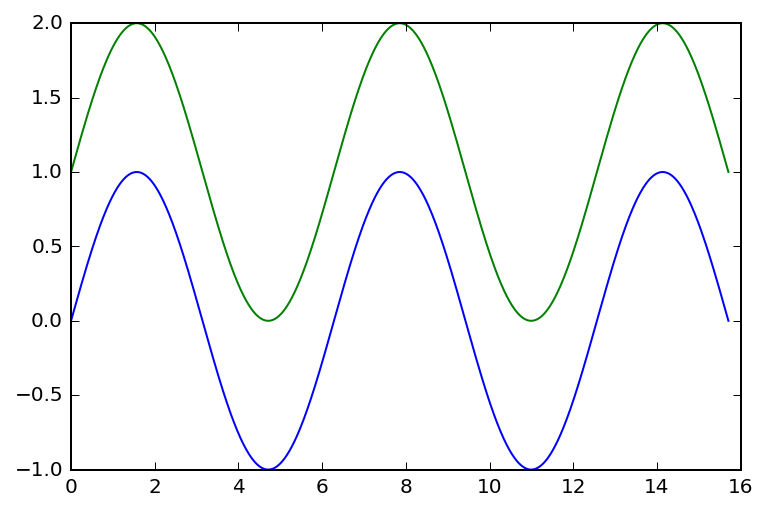

In [4]:
plt.plot(x, y)
plt.plot(x, y + 1)

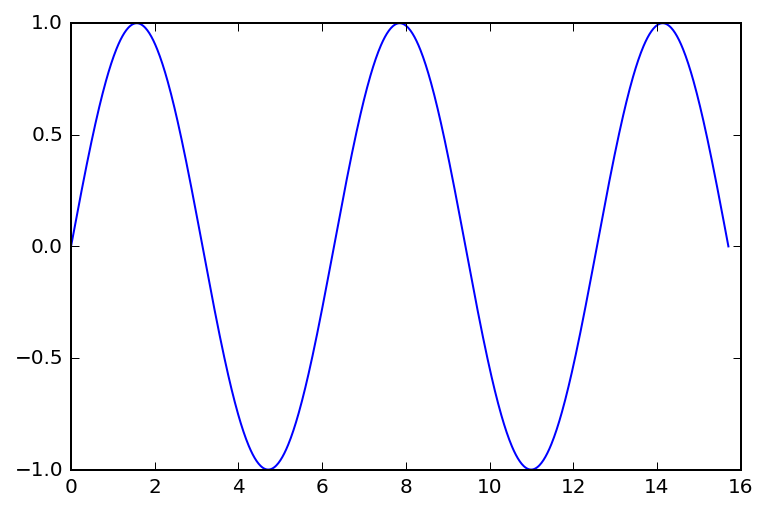

In [5]:
# Use trailing ";" to remove: [<matplotlib.lines.Line2D at 0x112059cf8]
plt.plot(x, y);

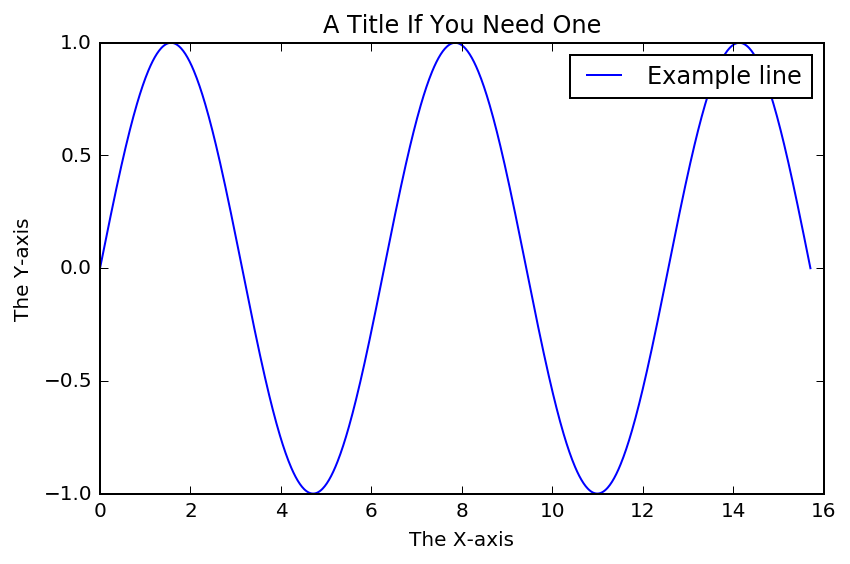

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Example line')
ax.legend()
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

Such a tiny plot! Let's make it bigger!

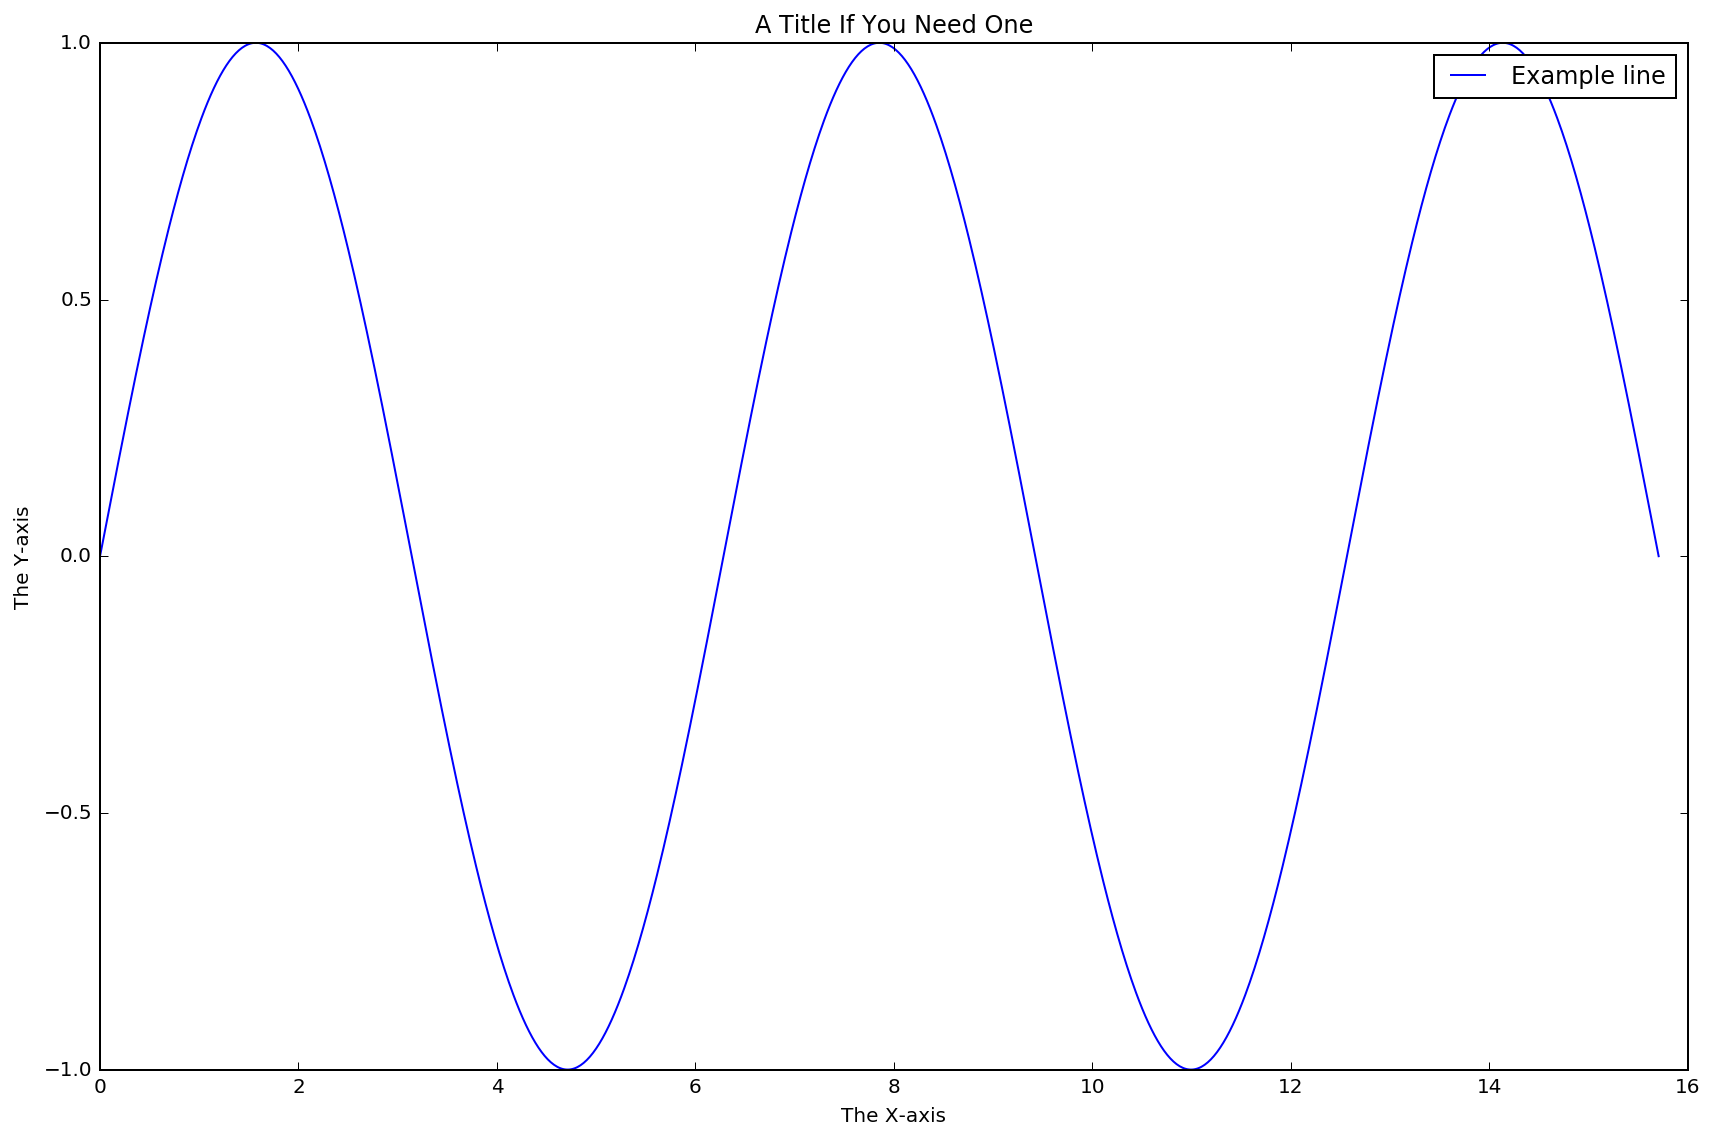

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, y, label='Example line')
ax.legend()
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

Now the plot is larger, but the text is tiny and terrible!

# Bring back seaborn

In [8]:
import seaborn as sns

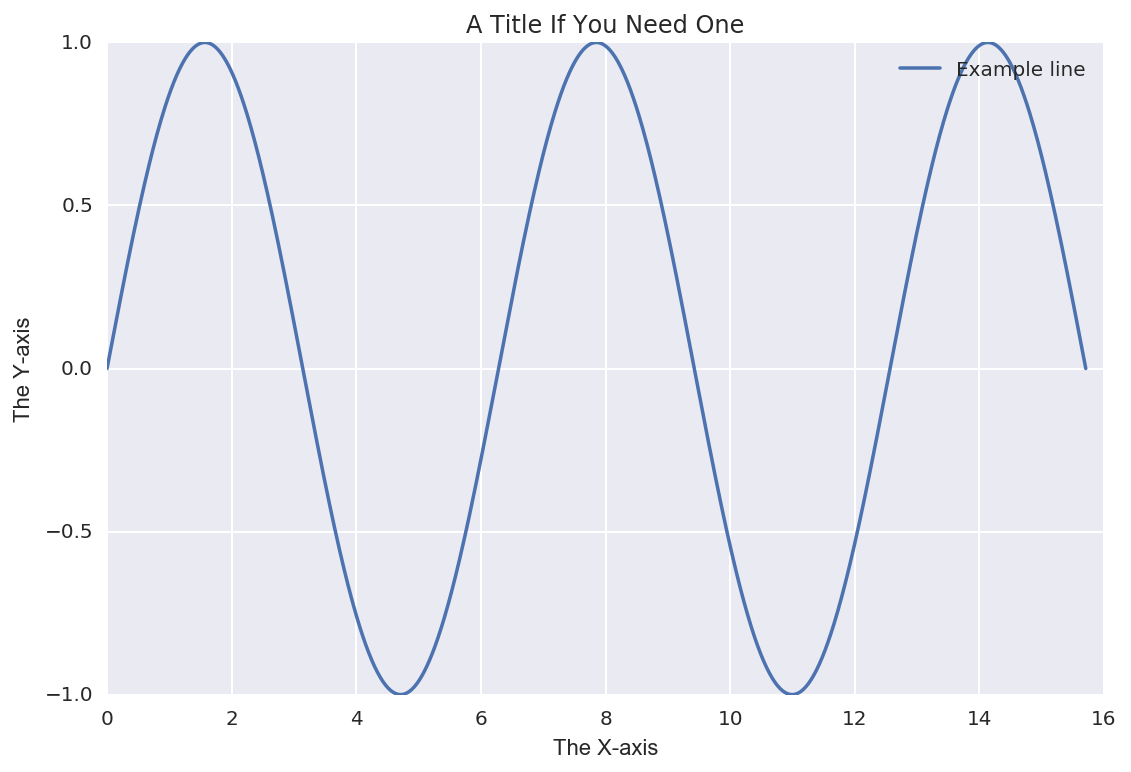

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Example line')
ax.legend()
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

In [10]:
sns.set_context("poster", font_scale=1.3)

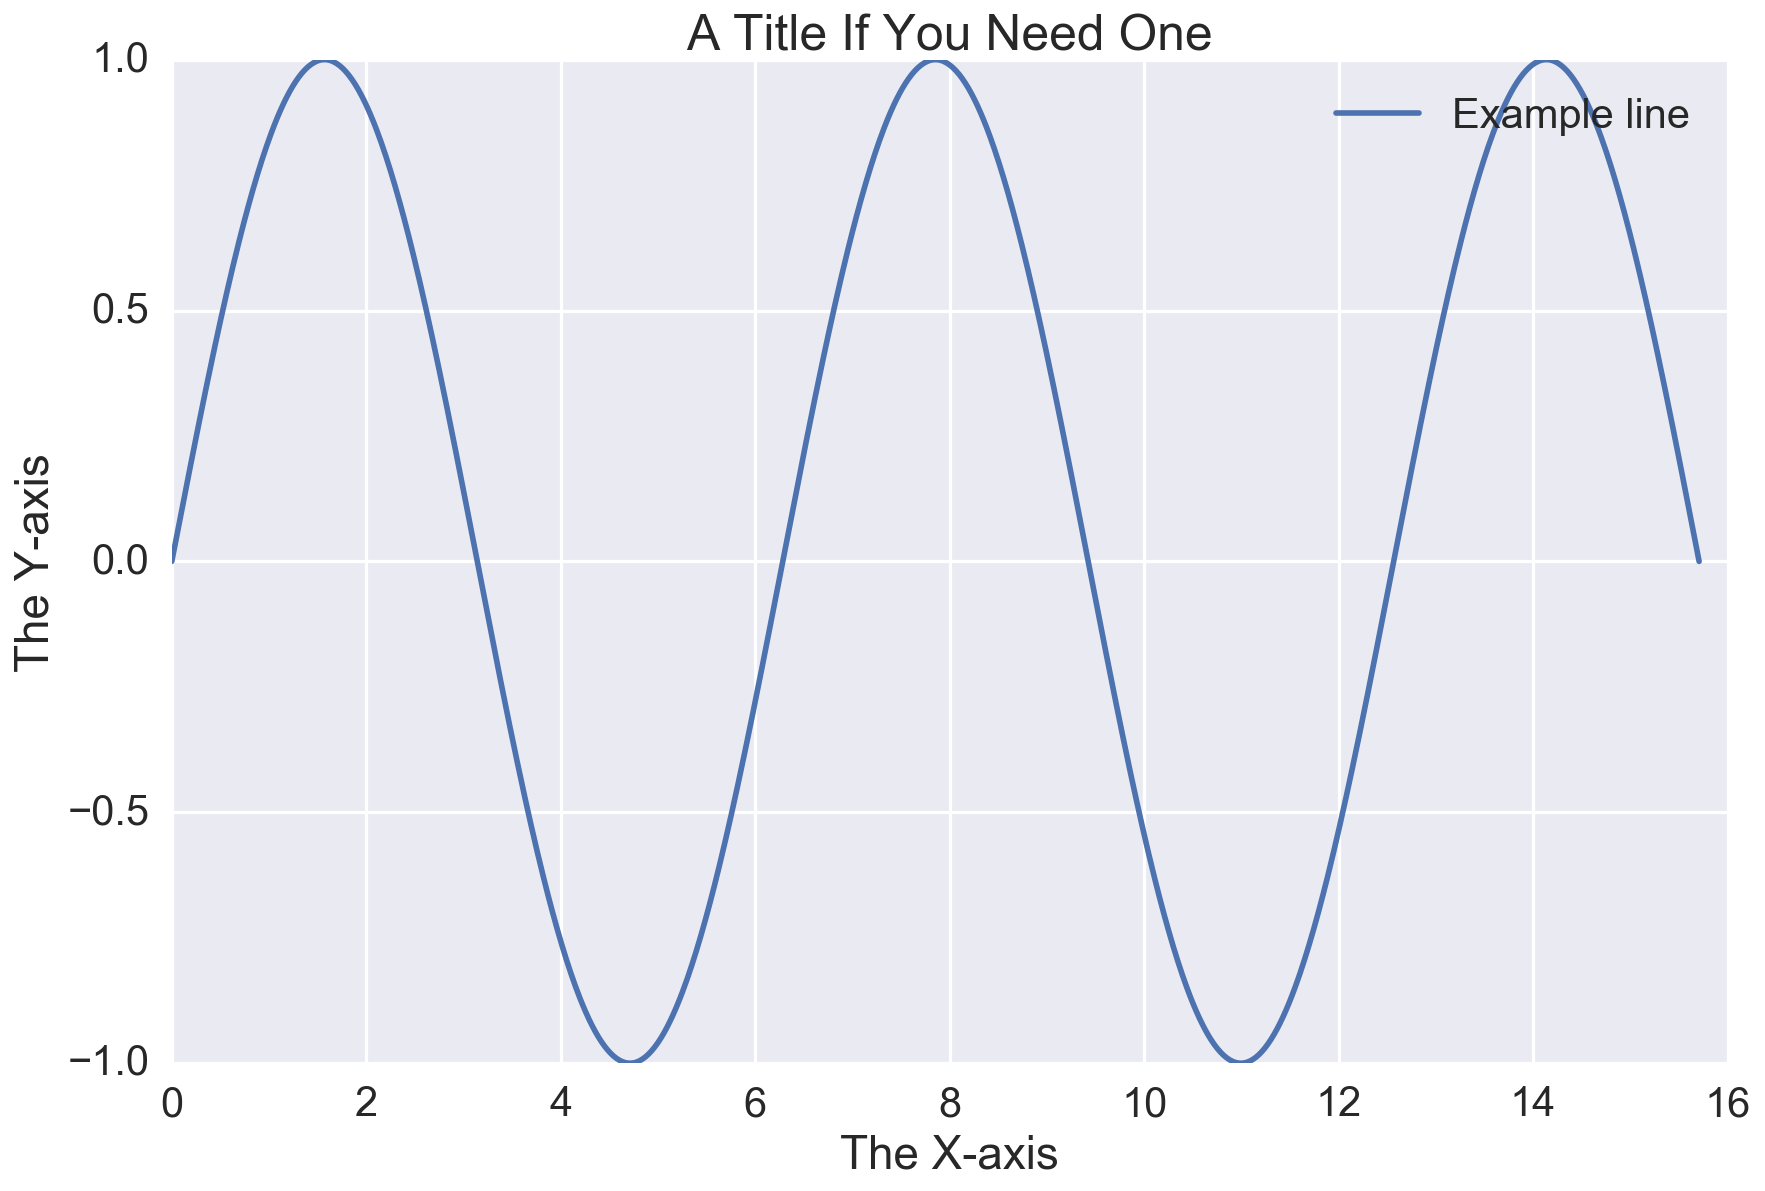

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Example line')
ax.legend()
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

Legible plot! But that legend placement is bad and we should feel bad.

  
  
  
What do we do when we feel bad?

In [20]:
# We plot a puppy to make us feel a bit better
sns.puppyplot()

And then we fix the legend.

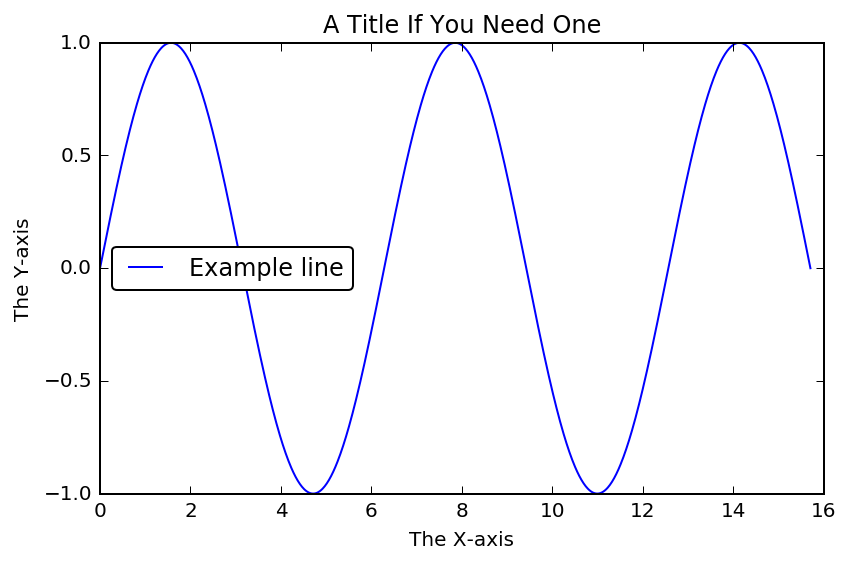

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Example line')
# This magic usually helps (if not there are more options later!)
ax.legend(loc='best')
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

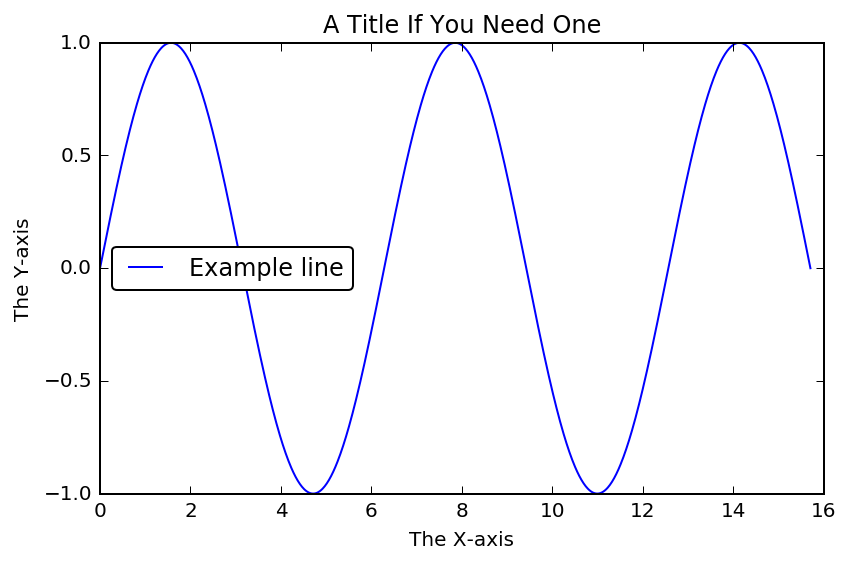

In [22]:
# And we can make the legends fancy
mpl.rcParams["legend.fancybox"] = True

fig, ax = plt.subplots()
ax.plot(x, y, label='Example line')
ax.legend(loc='best')
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

In [23]:
# To reset to beginning matplotlib defaults :(
mpl.rcParams.update(inline_rc)

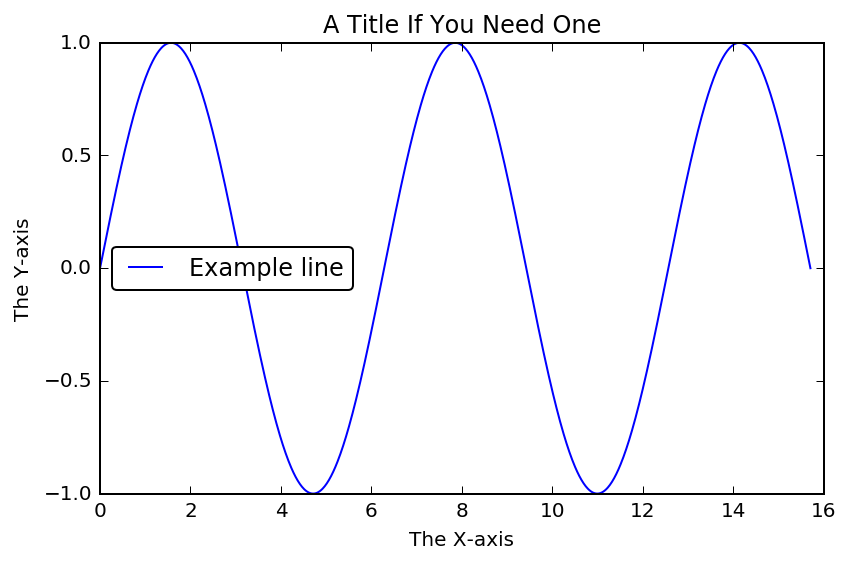

In [24]:
mpl.rcParams["legend.fancybox"] = True
fig, ax = plt.subplots()
ax.plot(x, y, label='Example line')
ax.legend(loc='best')
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

# Introducing the SVDS matplotlib _style_

In [25]:
import mplsvds 

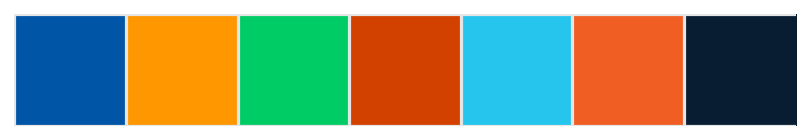

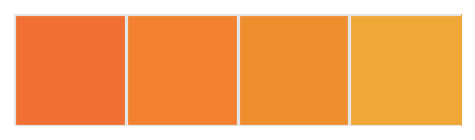

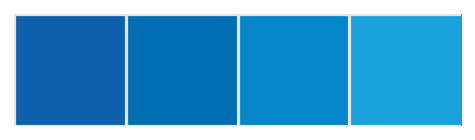

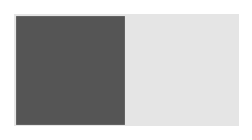

In [33]:
sns.palplot(mplsvds.svds_palette)
sns.palplot(mplsvds.oranges)
sns.palplot(mplsvds.blues)
sns.palplot([mplsvds.dark_gray, mplsvds.light_gray])

In [26]:
def sinplot(flip=1, ax=None):
    """Demo plot from seaborn."""
    x = np.linspace(0, 14, 500)
    for i in range(1, 7):
        ax.plot(x, np.sin(-1.60 + x + i * .5) * (7 - i) * flip, label=str(i))

In [28]:
# import seaborn as sns

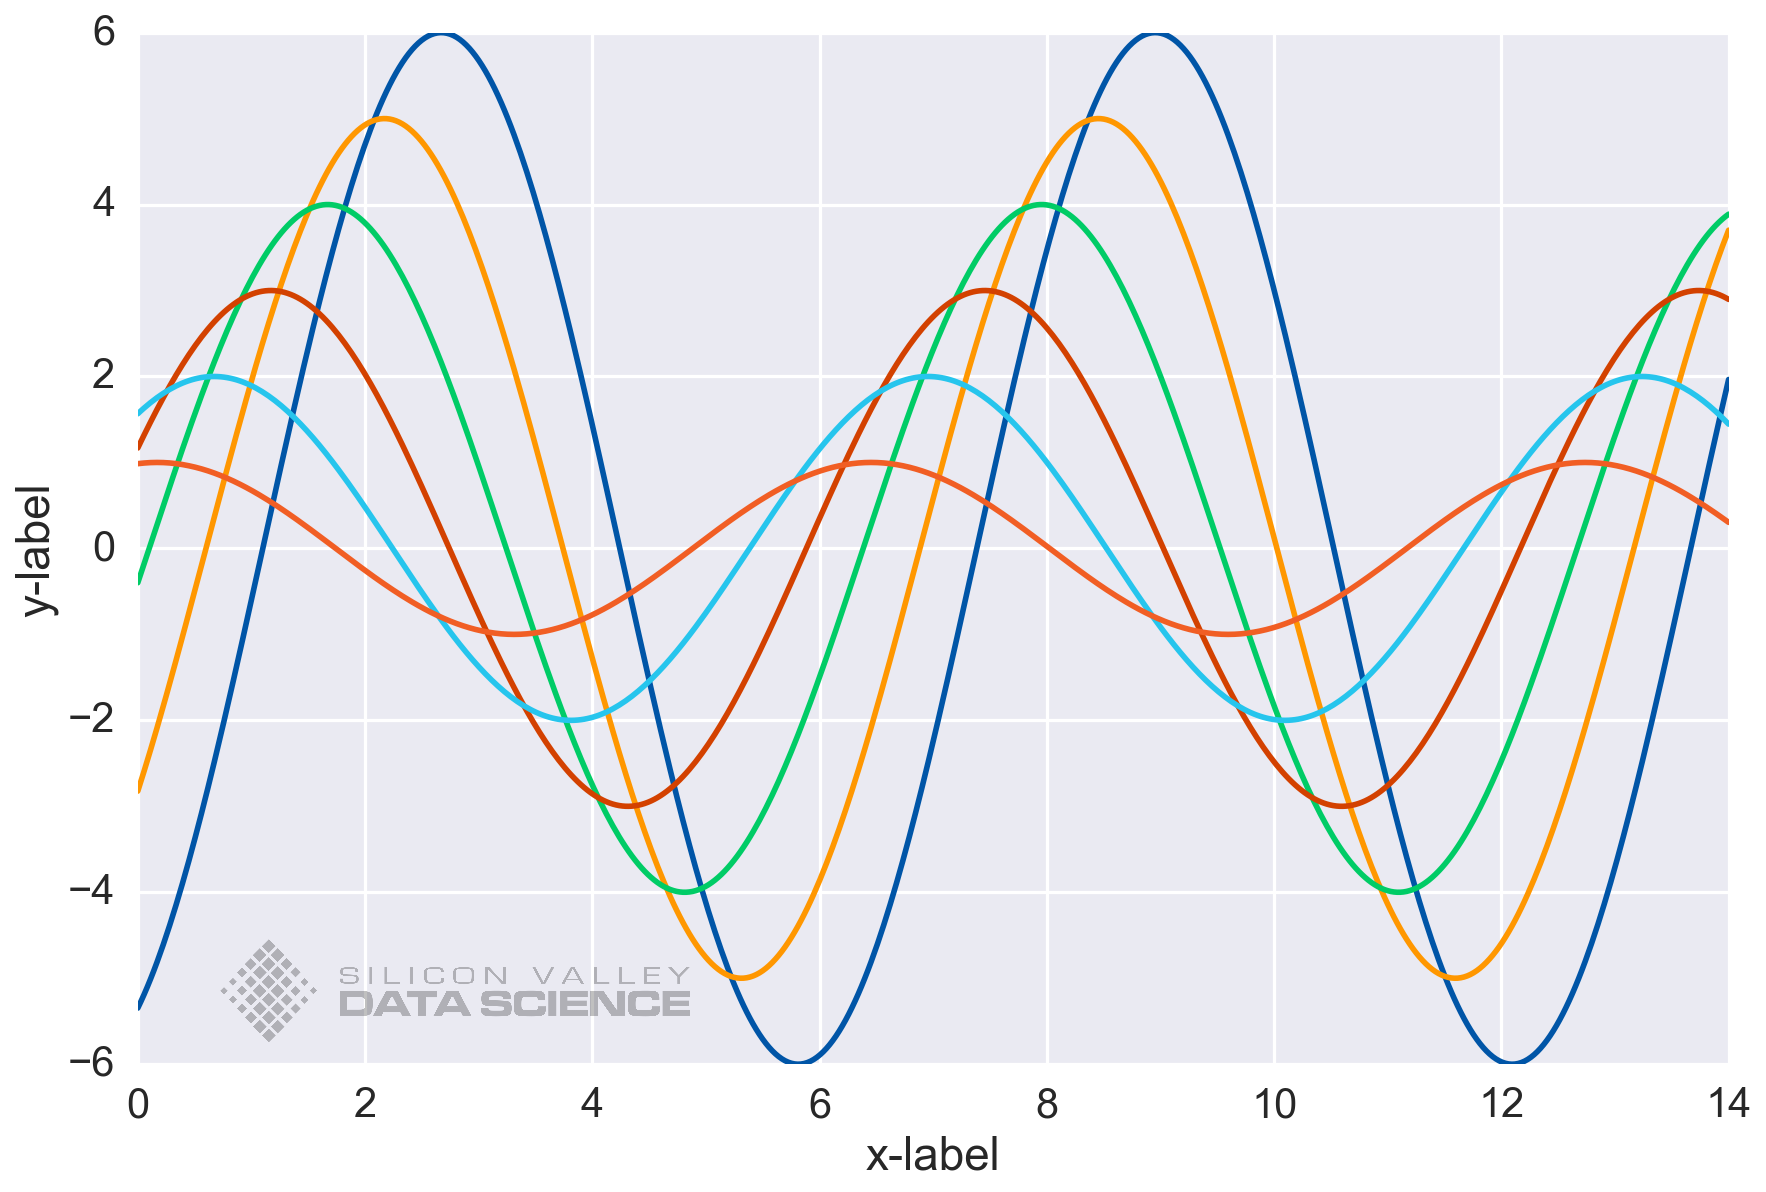

In [29]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    sinplot(ax=ax)
    ax.set_ylabel("y-label")
    ax.set_xlabel("x-label")
    # Add a logo! It comes w/ the mplsvds module!
    ax.figure.figimage(mplsvds.SVDSLOGO, 220, 150, alpha=.25, zorder=1)
    fig.tight_layout();


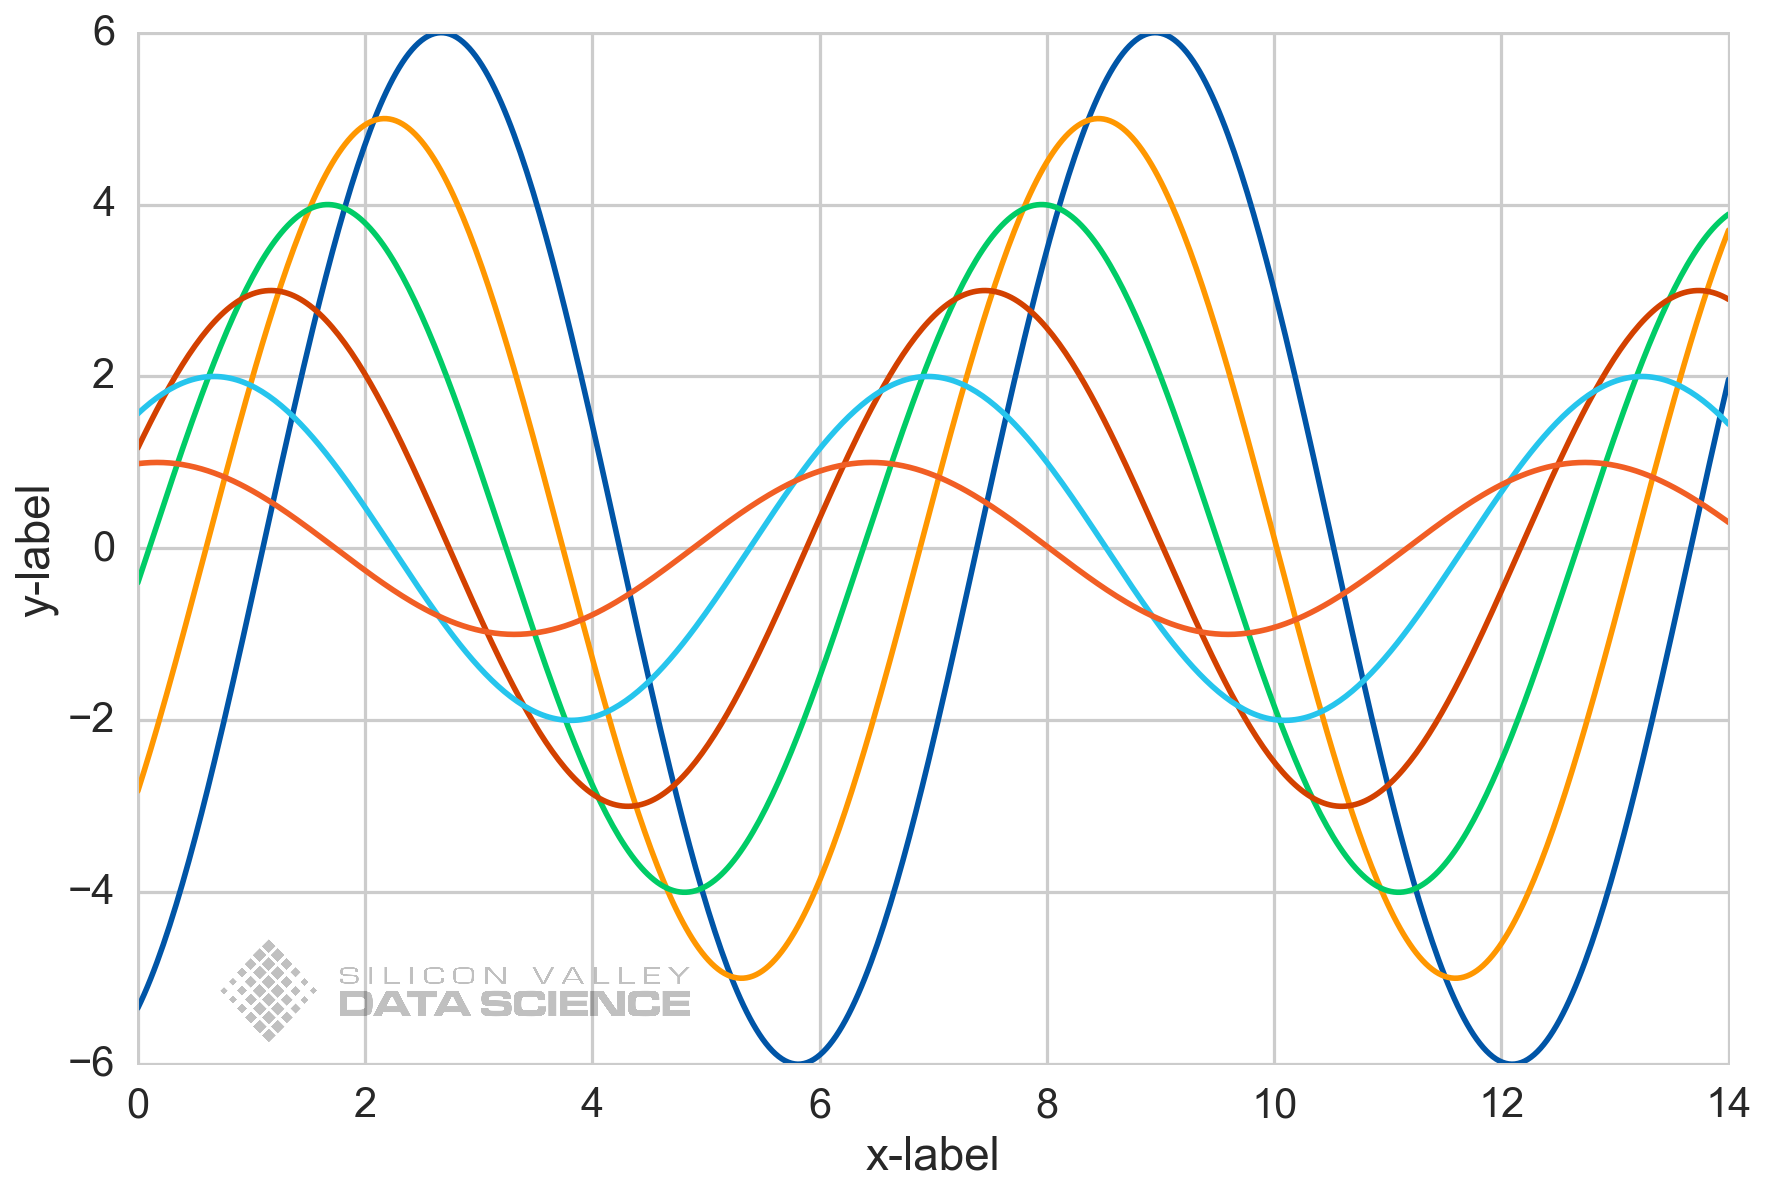

In [38]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots()
    sinplot(ax=ax)
    ax.set_ylabel("y-label")
    ax.set_xlabel("x-label")
    ax.figure.figimage(mplsvds.SVDSLOGO, 220, 150, alpha=.25, zorder=1)
    fig.tight_layout();


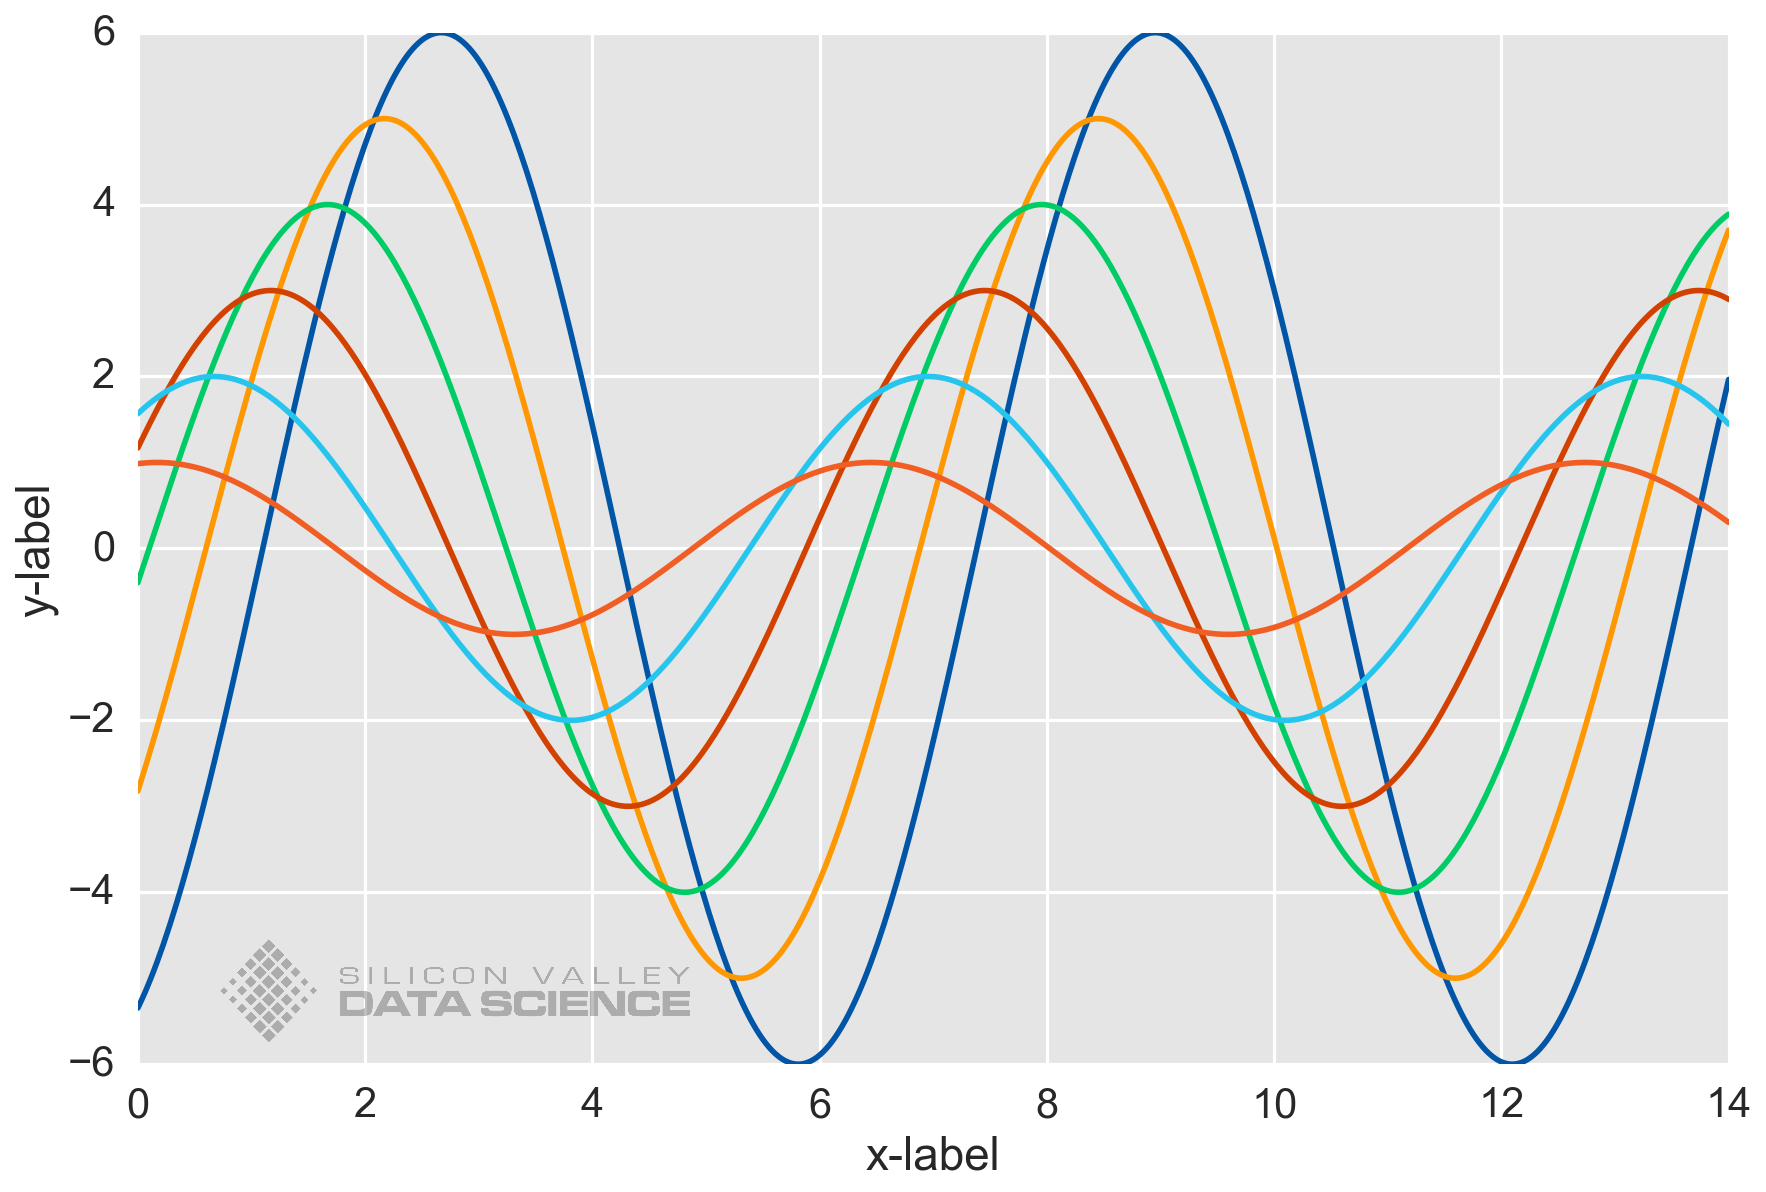

In [44]:
with sns.axes_style("darkgrid",{"axes.facecolor": mplsvds.light_gray}):
    fig, ax = plt.subplots()
    sinplot(ax=ax)
    ax.set_ylabel("y-label")
    ax.set_xlabel("x-label")
    ax.figure.figimage(mplsvds.SVDSLOGO, 220, 150, alpha=.25, zorder=1)
    fig.tight_layout();


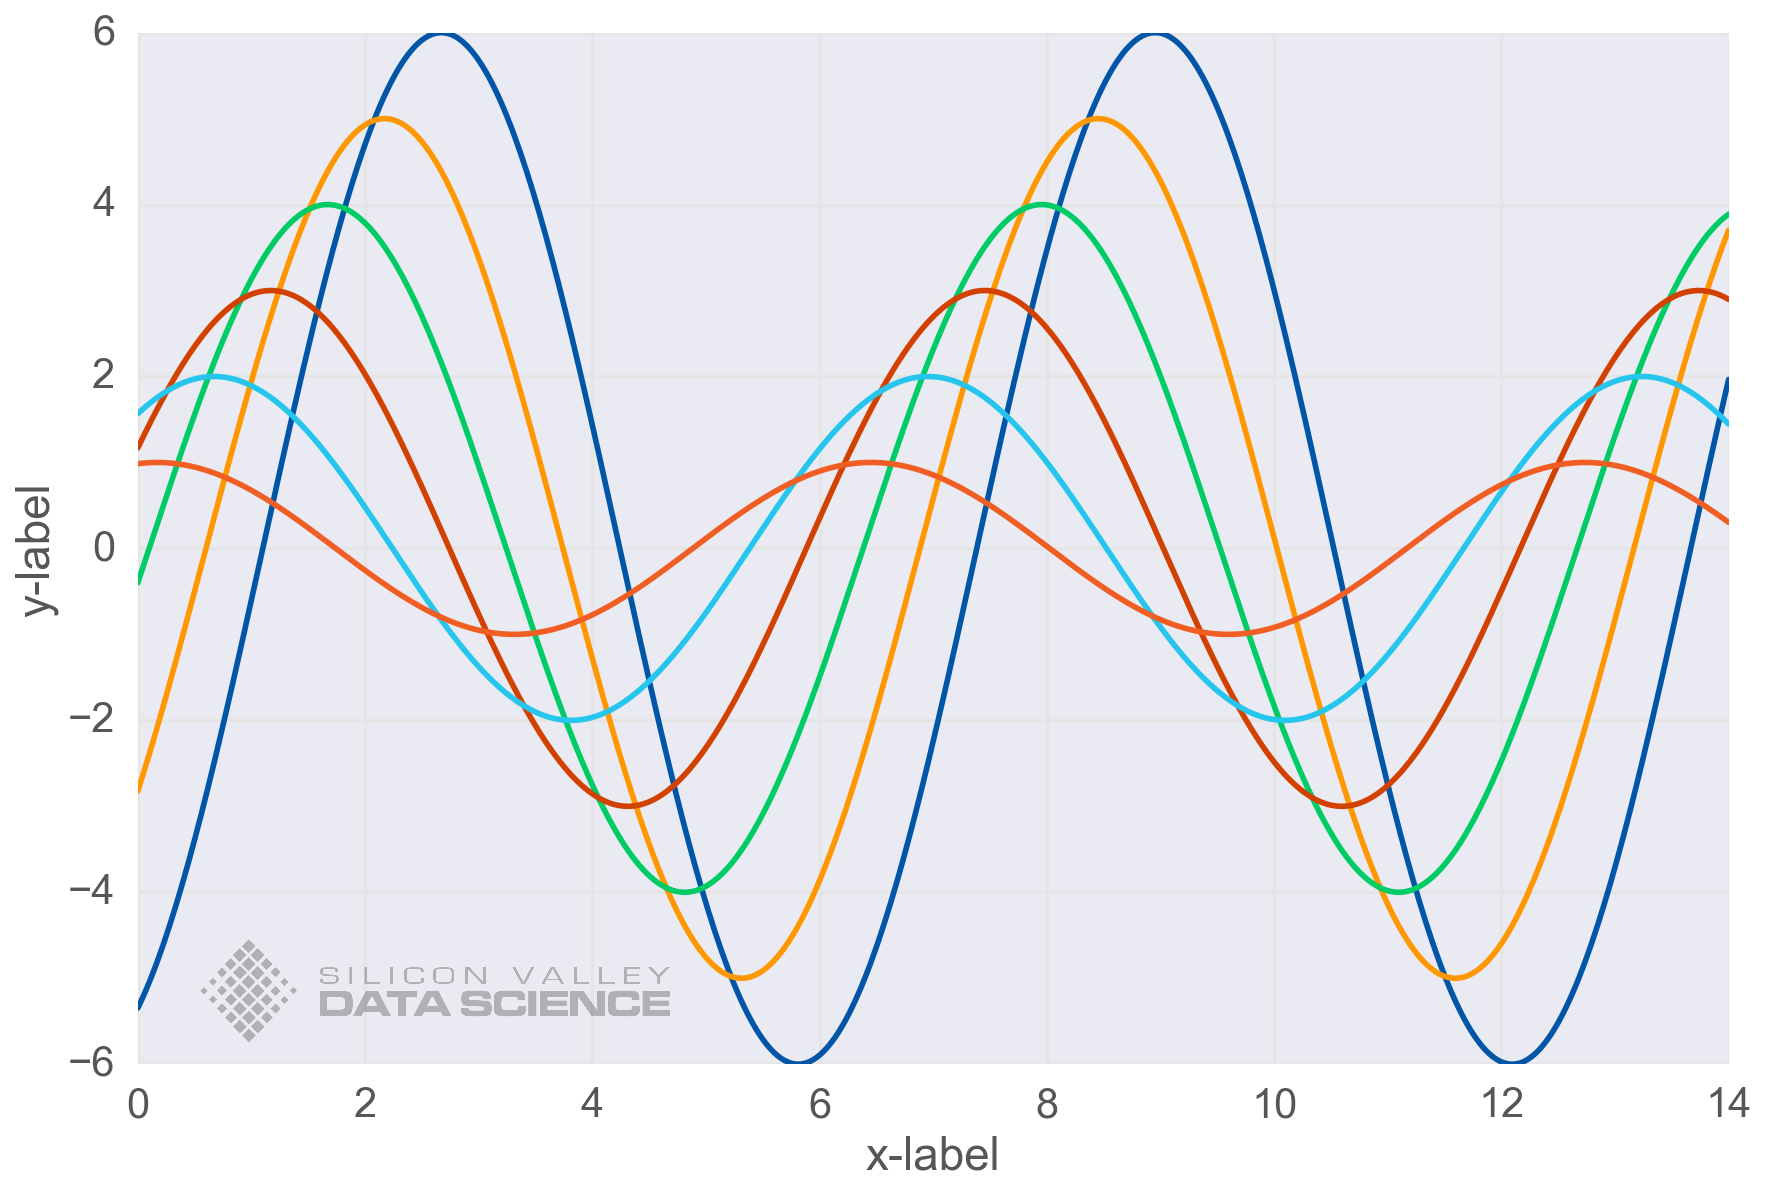

In [40]:
fig, ax = plt.subplots()
sinplot(ax=ax)
ax.set_ylabel("y-label")
ax.set_xlabel("x-label")
ax.figure.figimage(mplsvds.SVDSLOGO, 200, 150, alpha=.25, zorder=1)
fig.tight_layout();

## Sometimes there's too much going on in the plot so put the legend on the outside

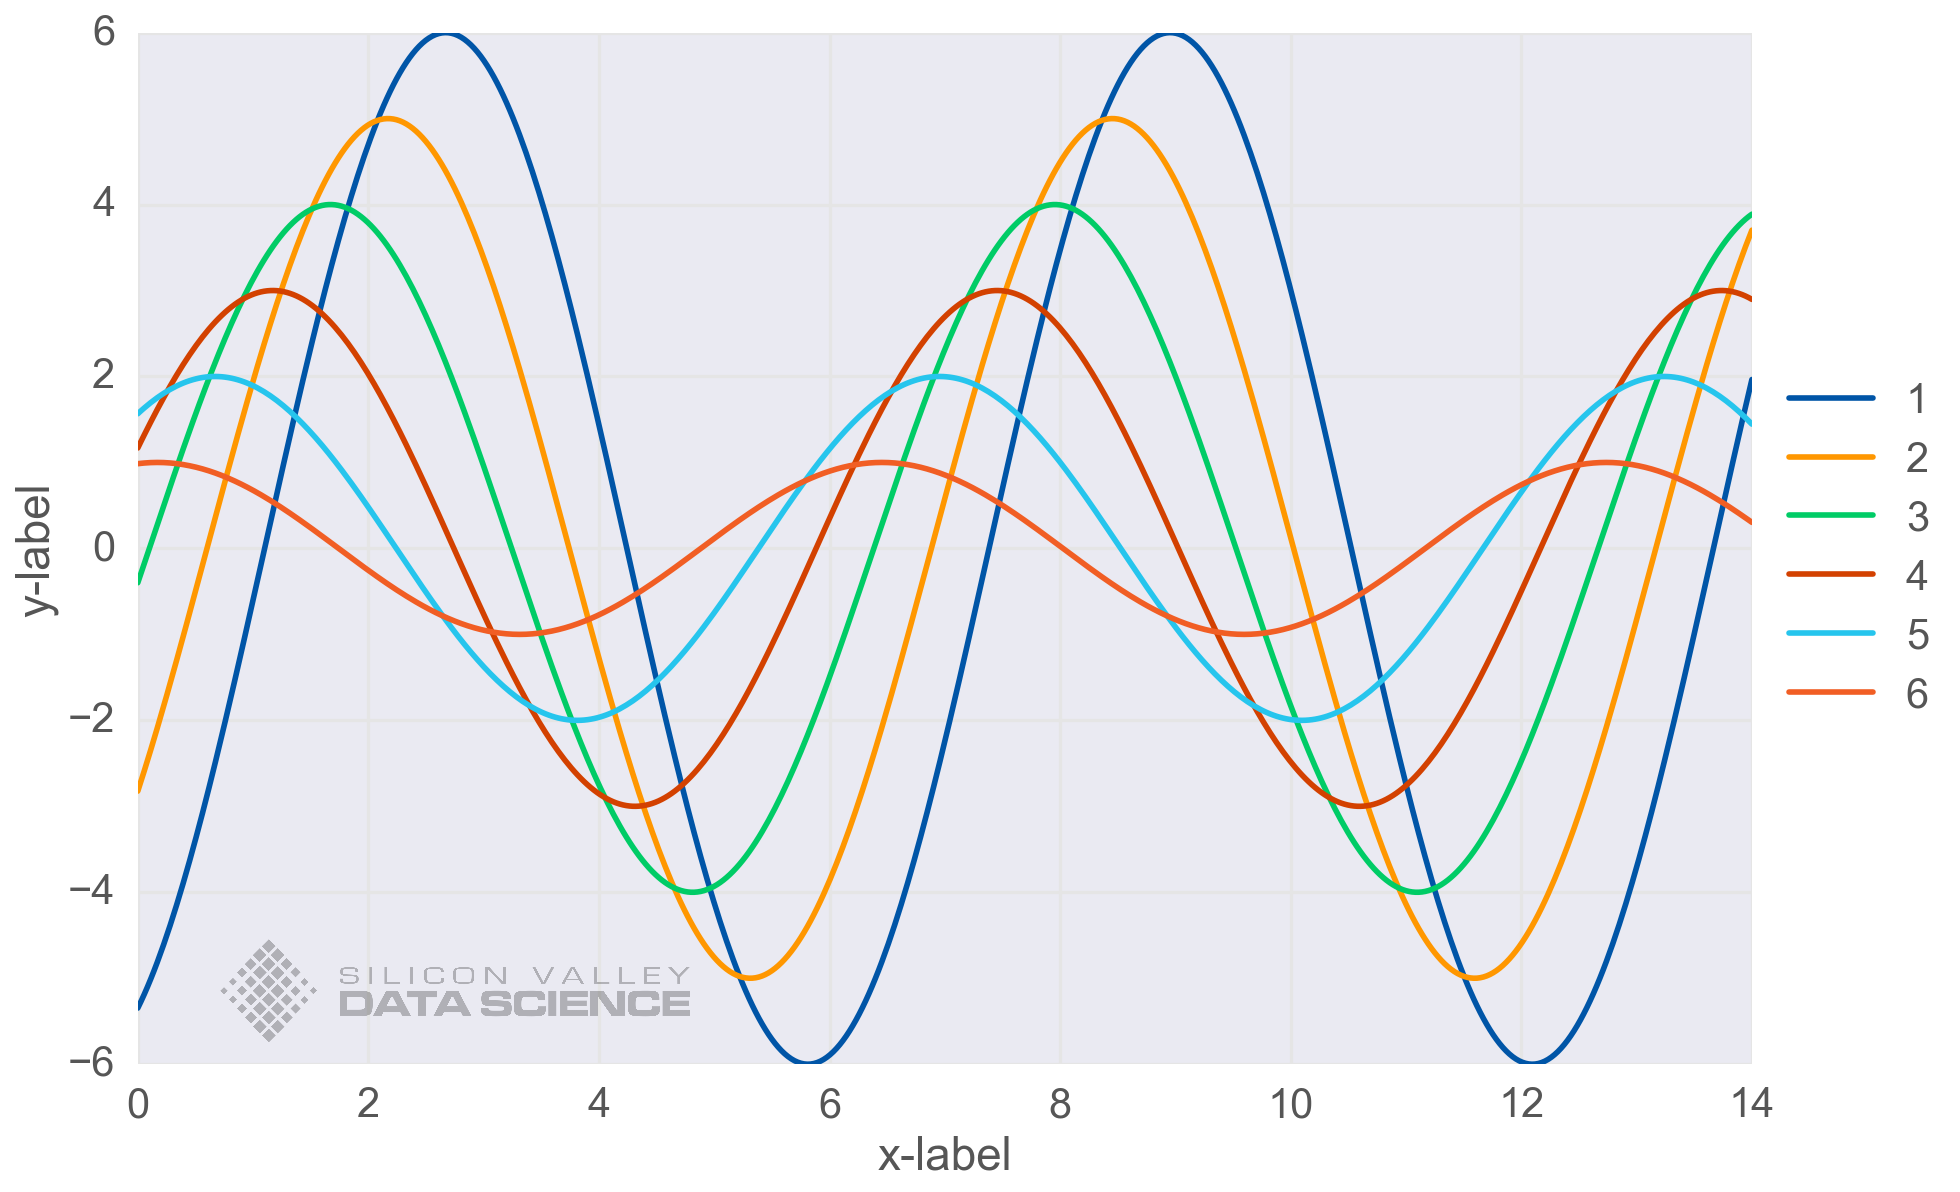

In [32]:
fig, ax = plt.subplots()
sinplot(ax=ax)
ax.set_ylabel("y-label")
ax.set_xlabel("x-label")
ax.figure.figimage(mplsvds.SVDSLOGO, 220, 150, alpha=.25, zorder=1)
# This is how to get the legend out of the plot in a reasonable way
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout();

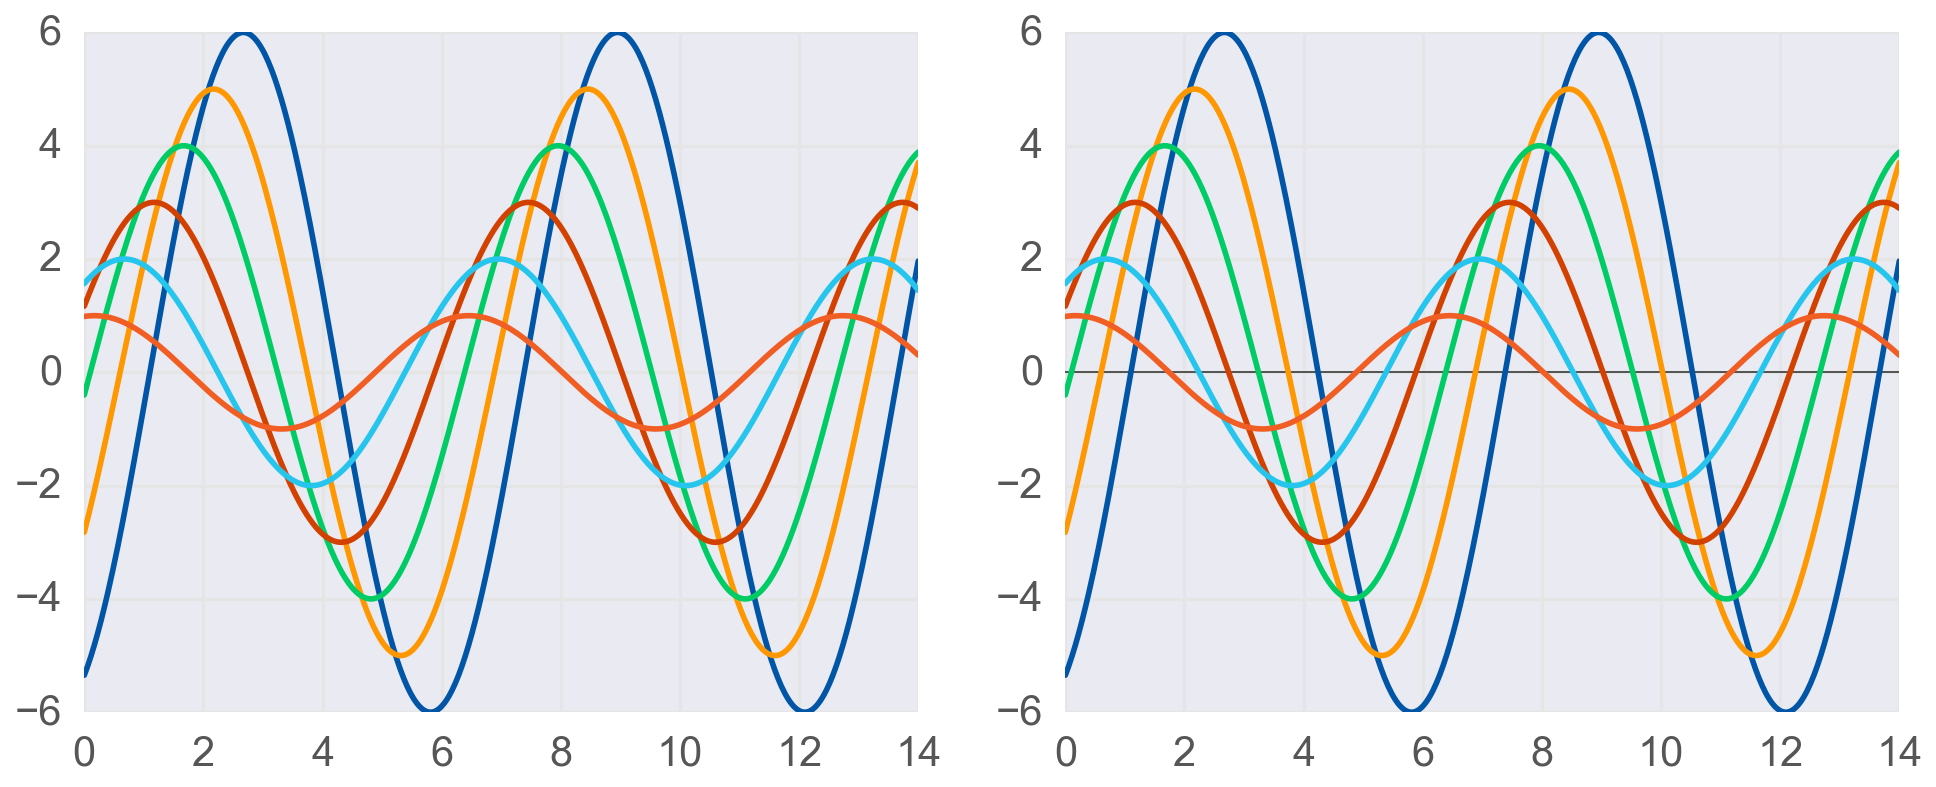

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

sinplot(ax=ax1)

# slight emphasis on y=0, note use of zorder to place line behind previously "drawn" lines
# zorder=1 is between gridlines and the sin curves
# the frame and ticklabels are mplsvds.dark_gray and the gridlines are mplsvds.light_gray
# (svds oyster gray does not seem to show up well in presentations...)
sinplot(ax=ax2)
ax2.axhline(0, color=mplsvds.dark_gray, zorder=1, lw=1)

fig.tight_layout()

### Use `plot` instead of `scatter`

`scatter` doesn't pick up the default property cycler, and it also unnessarily scales the plotting range.. it's simple enough to use `plot` with `lw=0` and `marker='o'` to replicate results.

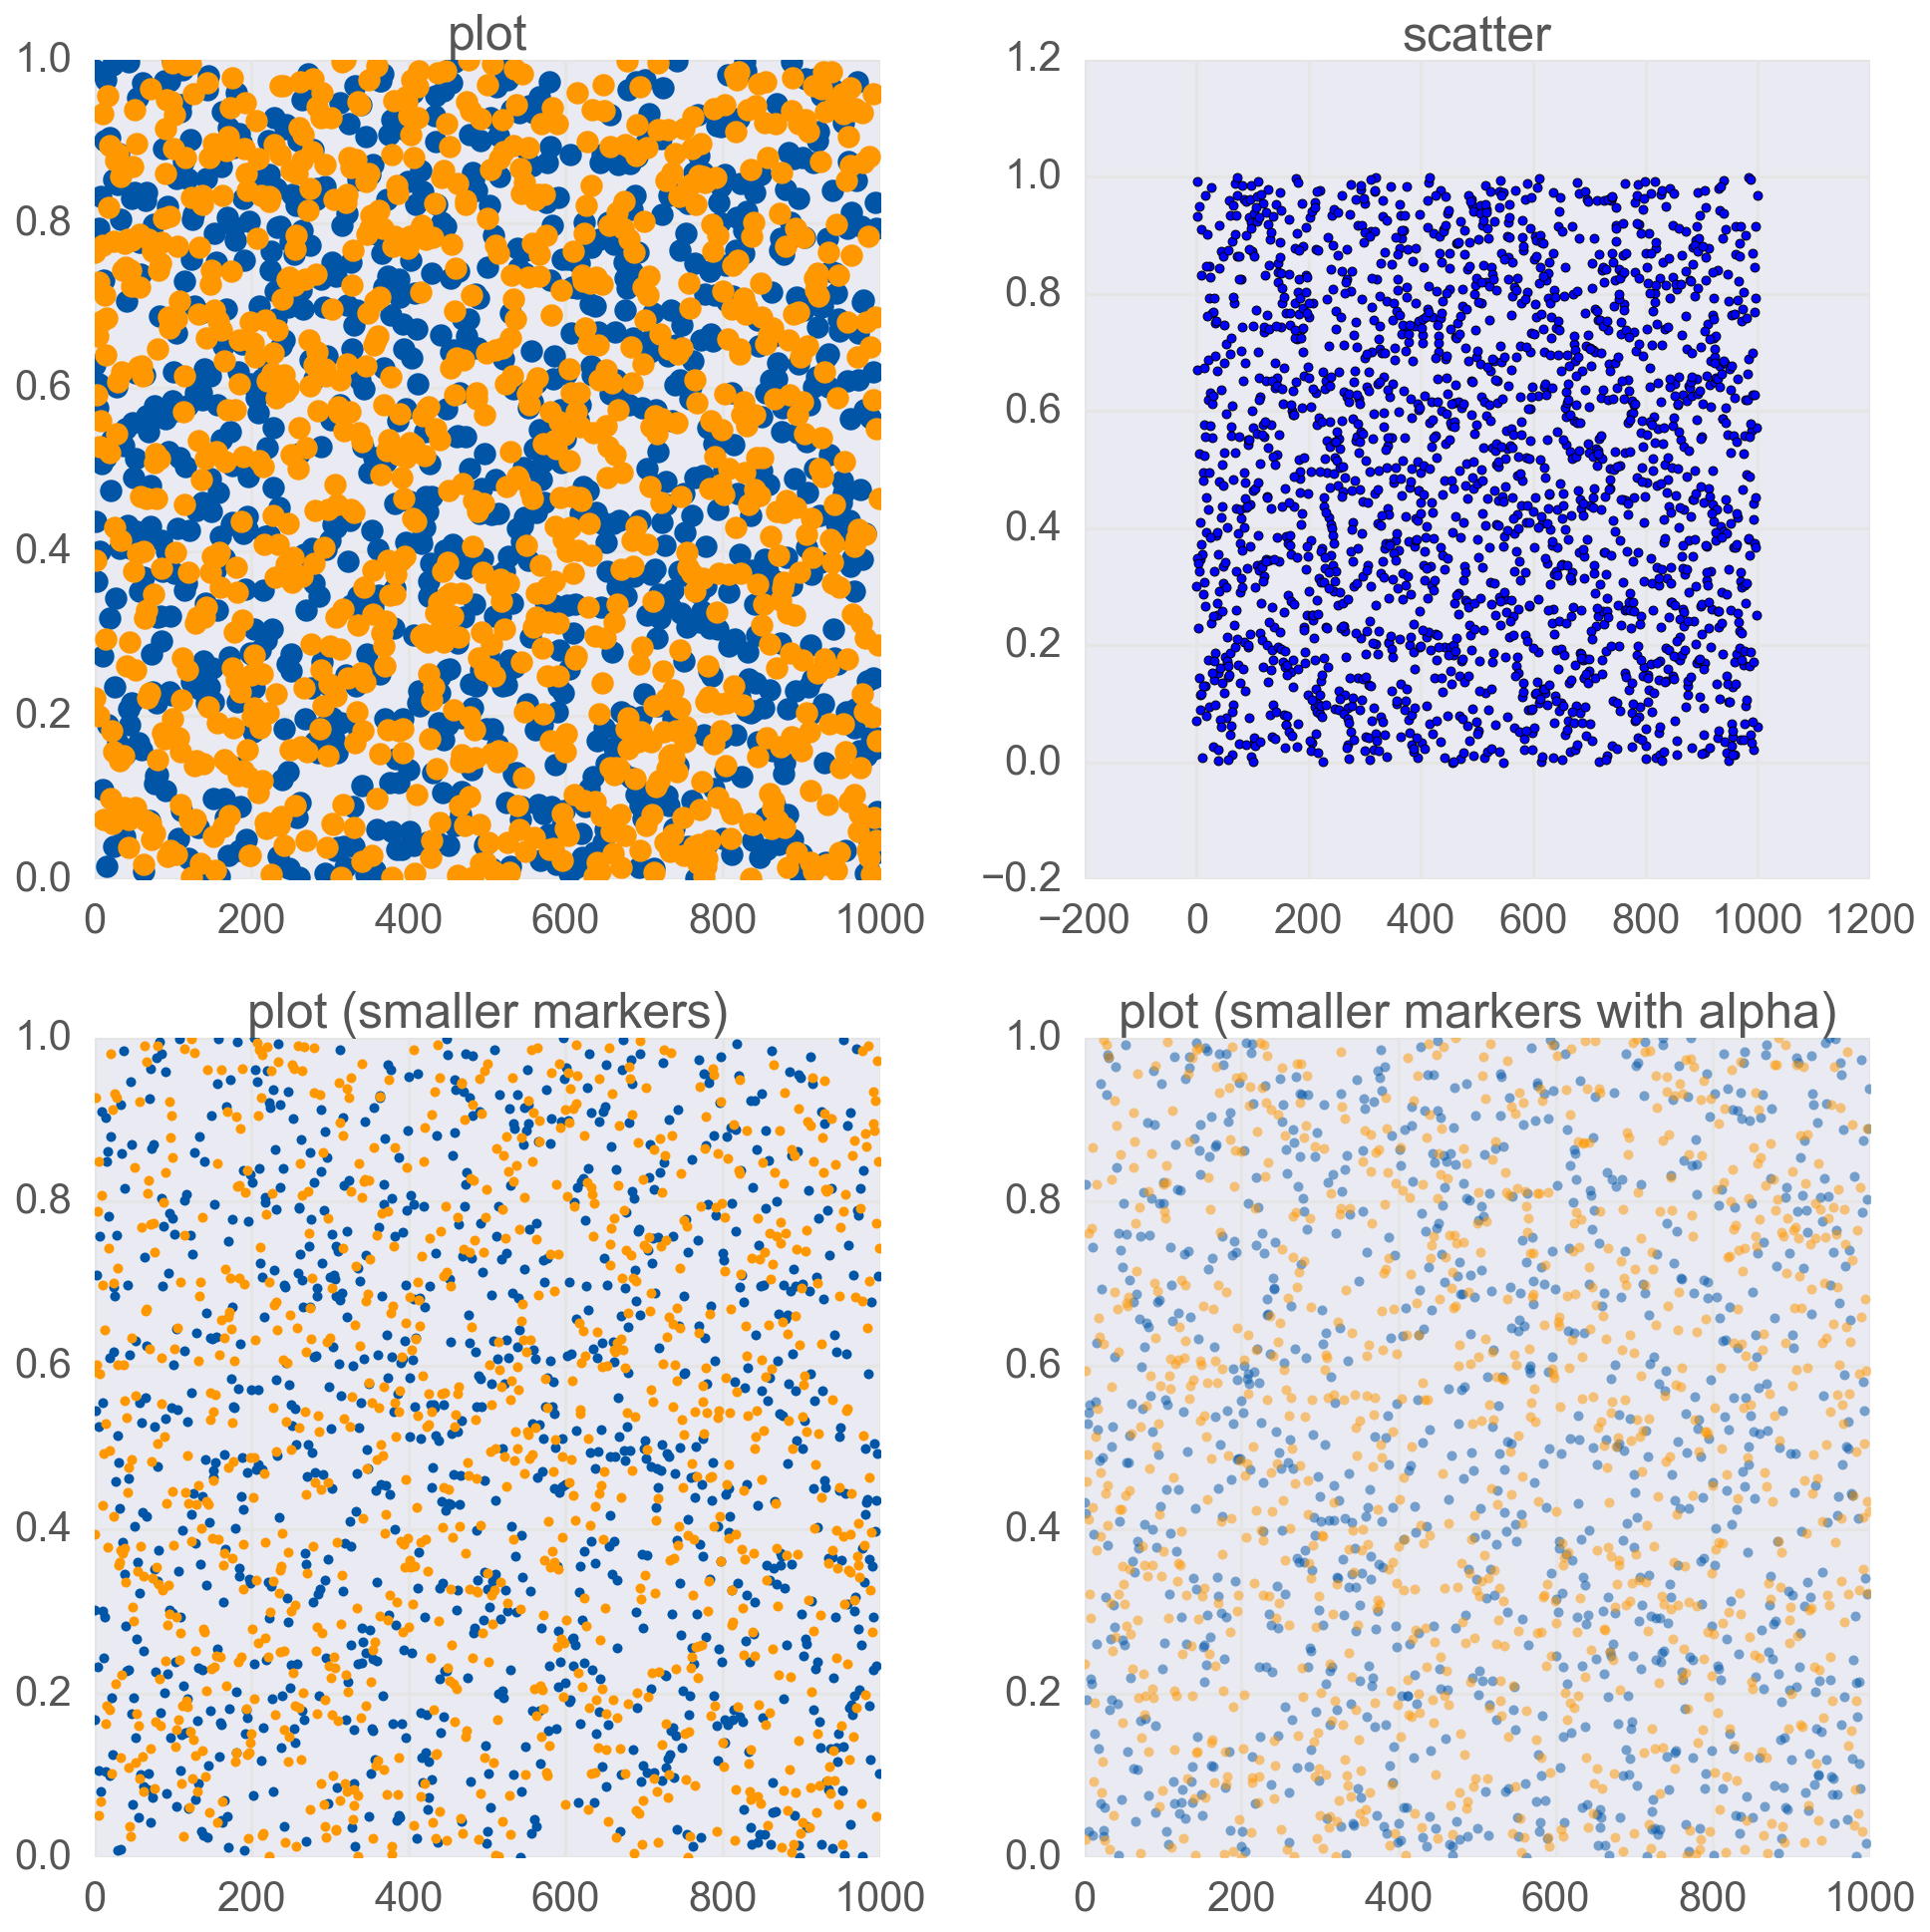

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

ax1.plot(np.random.rand(1000), lw=0, marker='o')
ax1.plot(np.random.rand(1000), lw=0, marker='o')
ax1.set_title('plot')

ax2.scatter(np.arange(1000), np.random.rand(1000))
ax2.scatter(np.arange(1000), np.random.rand(1000))
ax2.set_title('scatter')

ax3.plot(np.random.rand(1000), lw=0, marker='o', markersize=5)
ax3.plot(np.random.rand(1000), lw=0, marker='o', markersize=5)
ax3.set_title('plot (smaller markers)')

# note that scatter marker size is also a bit different
ax4.plot(np.arange(1000), np.random.rand(1000), lw=0, marker='o', markersize=5, alpha=0.5)
ax4.plot(np.arange(1000), np.random.rand(1000), lw=0, marker='o', markersize=5, alpha=0.5)
ax4.set_title('plot (smaller markers with alpha)')

fig.tight_layout()

# Create some fake data

In [51]:
n = 100
x = np.random.rand(n)
def f(x):
    return x
y = f(x)
yerr = 0.2*np.random.randn(n)

x2 = np.random.rand(n)
def f2(x):
    return 1.5*x**2
y2 = f2(x2)
y2err = 0.2*np.random.randn(n)

In [52]:
df = pd.DataFrame({'x': x, 
                   'y':y,
                   'yerr':yerr,
                  })

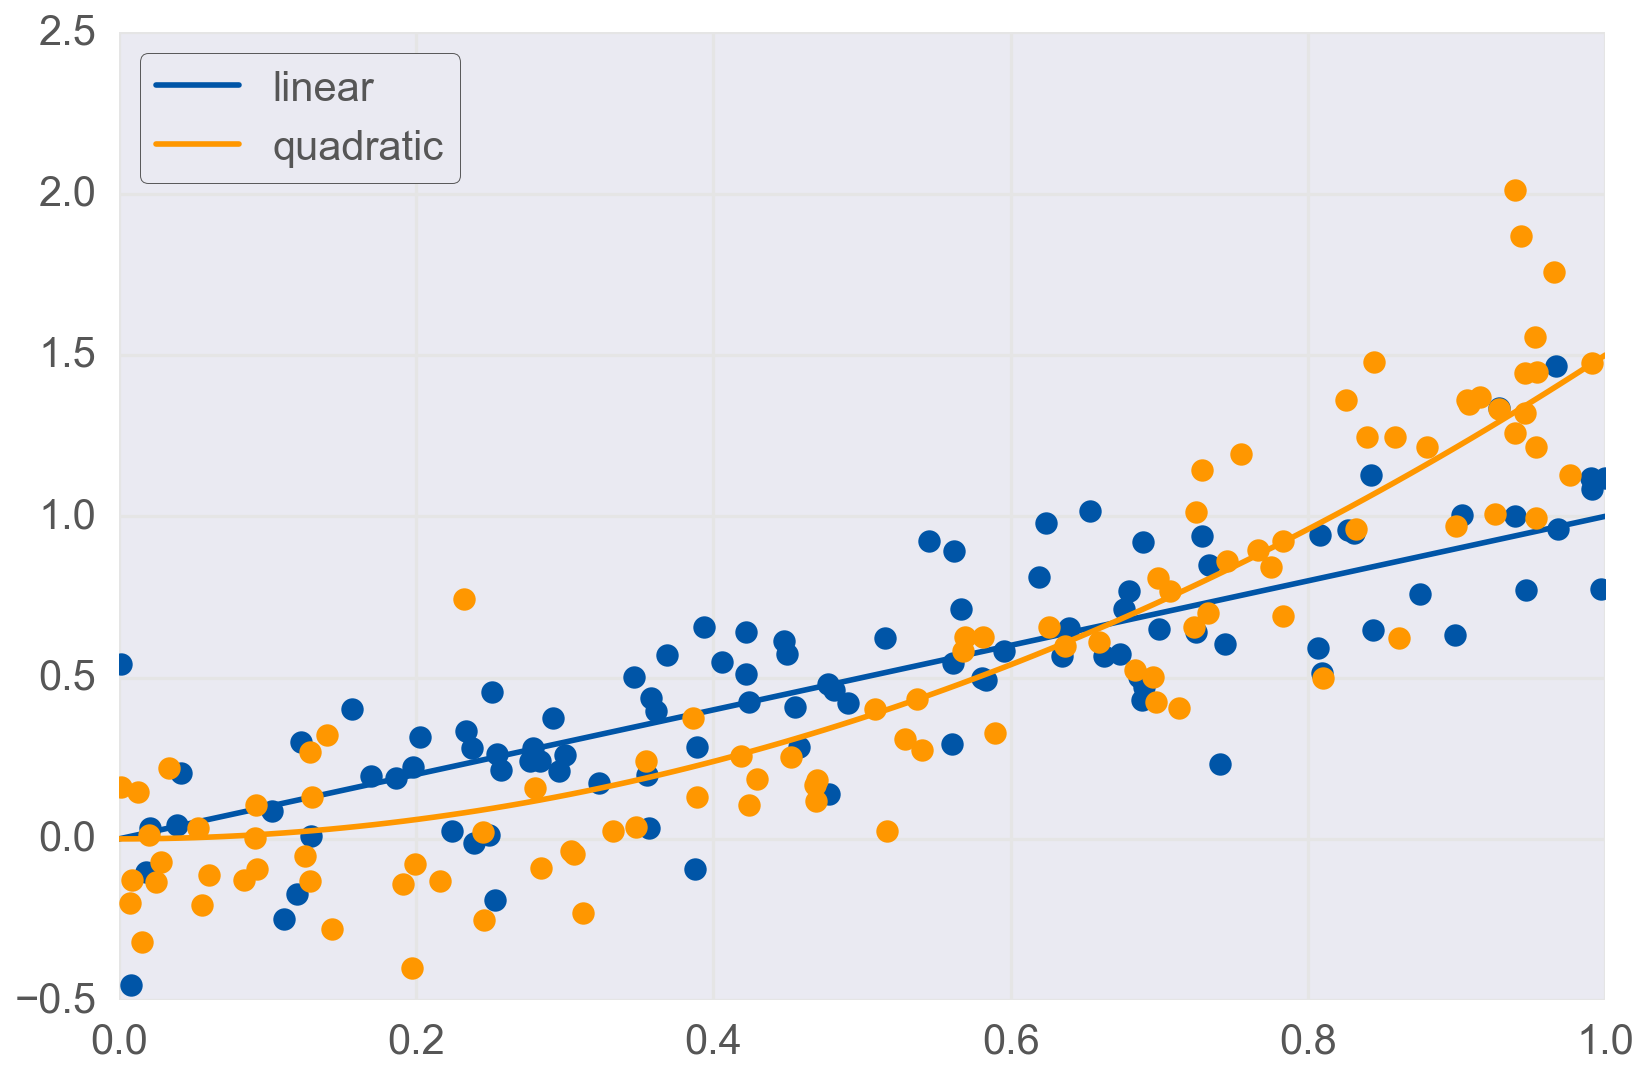

In [53]:
fig, ax = plt.subplots(figsize=mplsvds.WIDE)

lines, = ax.plot(x, y+yerr, marker='o', lw=0)
lines, = ax.plot(np.linspace(0,1,n), f(np.linspace(0,1,n)), color=lines.get_color(), label='linear')

lines, = ax.plot(x2, y2 + y2err, marker='o', lw=0)
lines, = ax.plot(np.linspace(0,1,n), f2(np.linspace(0,1,n)), color=lines.get_color(), label='quadratic')

plt.legend(frameon=True, loc='upper left')
fig.tight_layout()

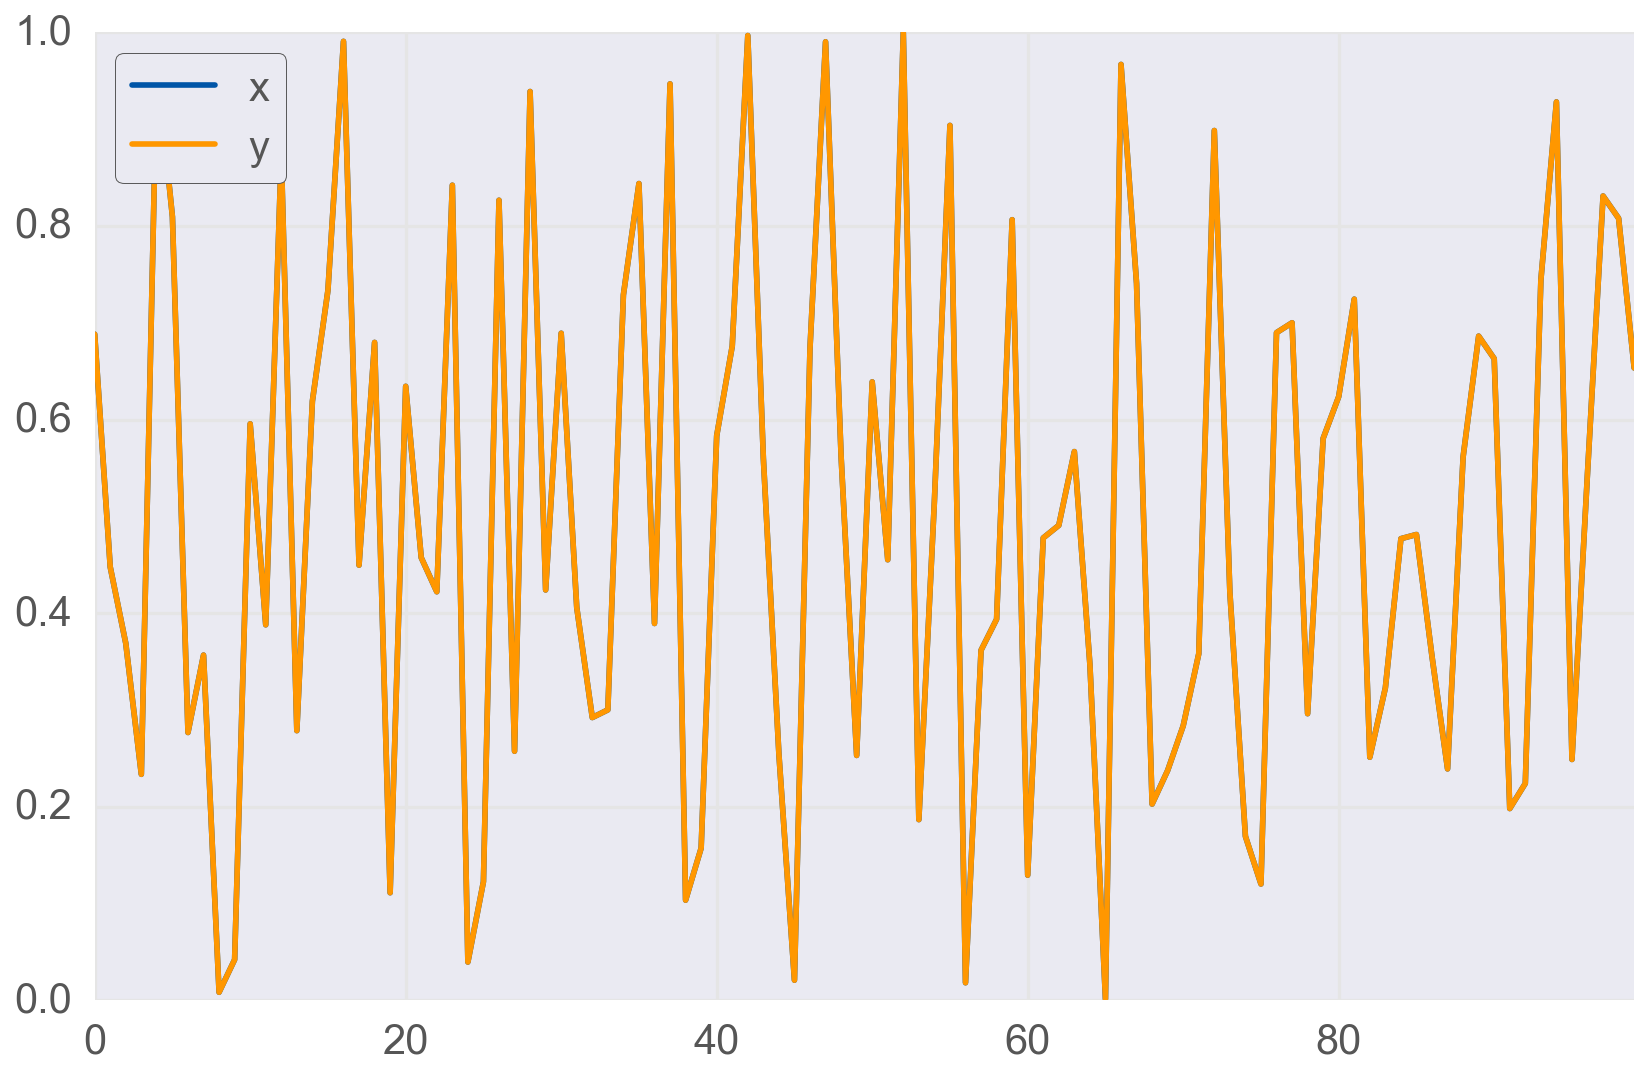

In [61]:
fig, ax = plt.subplots(figsize=mplsvds.WIDE)

# lines, = ax.plot(x, y+yerr, marker='o', lw=0)
df.x.plot(ax=ax)
df.y.plot(ax=ax)

# lines, = ax.plot(np.linspace(0,1,n), f(np.linspace(0,1,n)), color=lines.get_color(), label='linear')

# lines, = ax.plot(x2, y2 + y2err, marker='o', lw=0)
# lines, = ax.plot(np.linspace(0,1,n), f2(np.linspace(0,1,n)), color=lines.get_color(), label='quadratic')

plt.legend(frameon=True, loc='upper left')
fig.tight_layout()

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot

In [ ]:
df

/Users/jonathan/miniconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


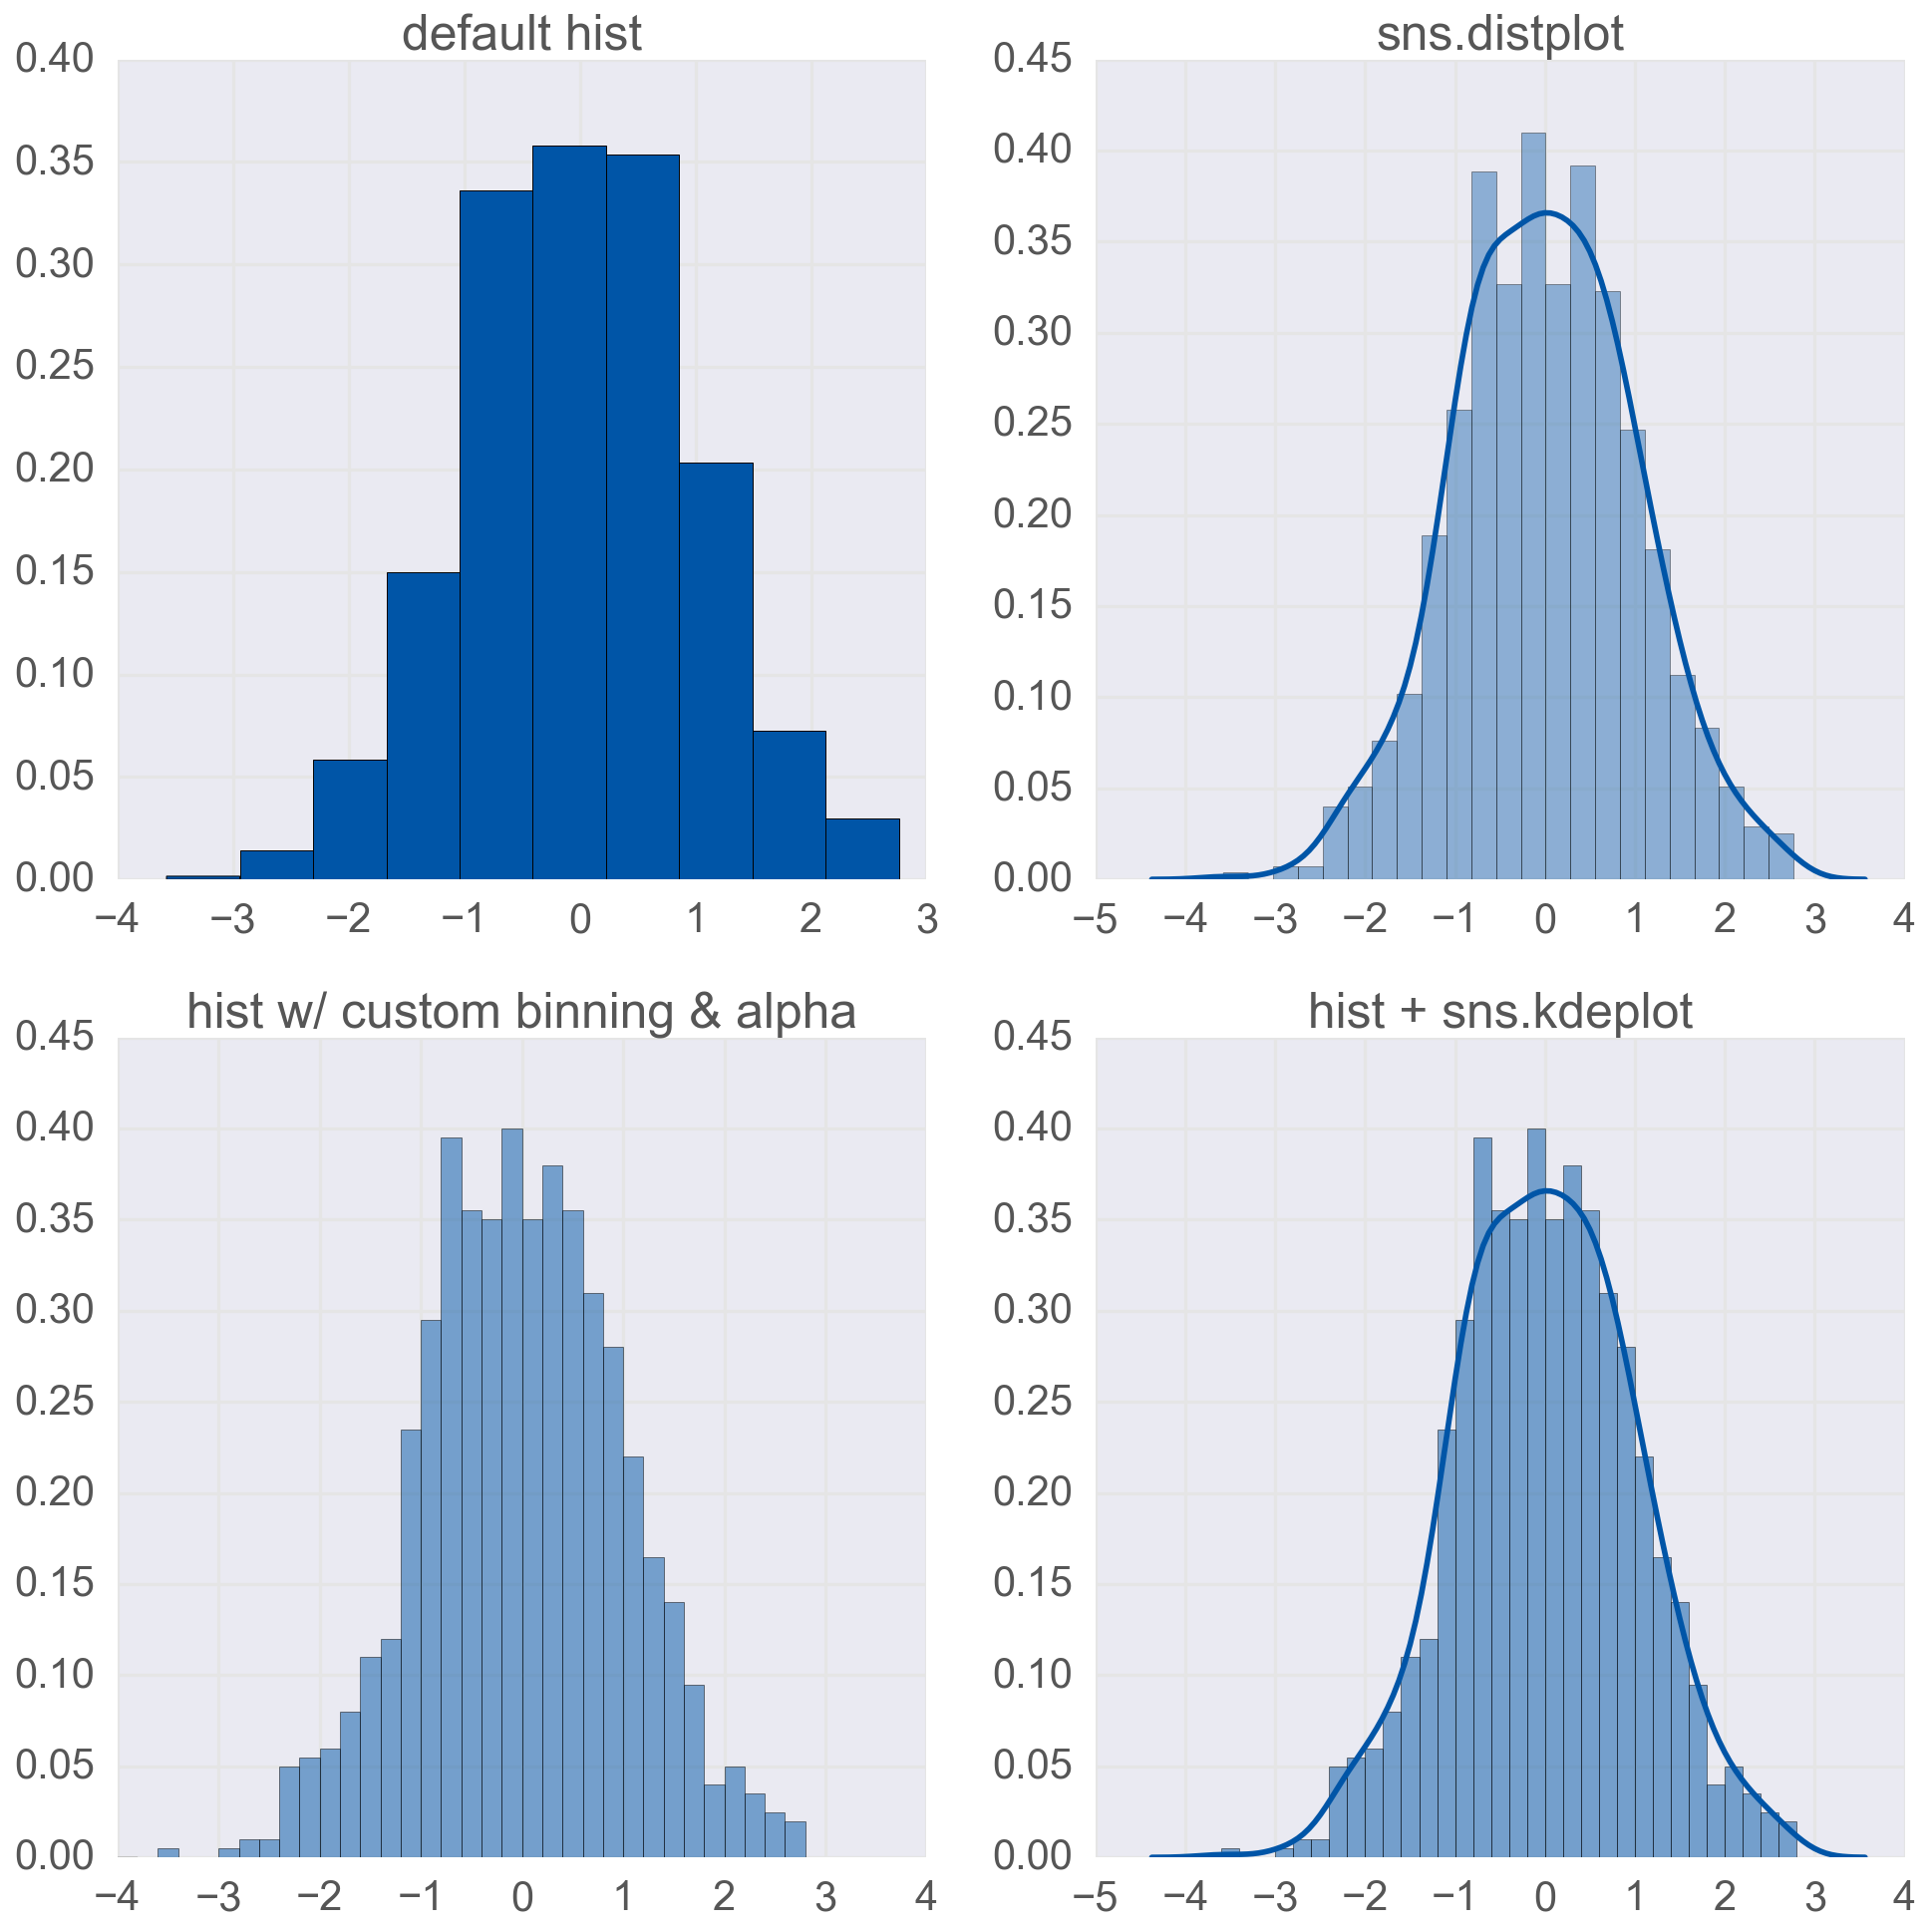

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

x = np.random.normal(size=1000)

ax1.hist(x, normed=True)
ax1.set_title('default hist')

sns.distplot(x, ax=ax2)
ax2.set_title('sns.distplot')

# it's not too hard to replicate what sns does
ax3.hist(x, bins=np.linspace(-4, 4, 41), alpha=.5, normed=True)
ax3.set_title('hist w/ custom binning & alpha')

# the kdeplot is the real convenience
n, bins, patches = ax4.hist(x, bins=np.linspace(-4, 4, 41), alpha=.5, normed=True)
# how do you grab the color from patches?
sns.kdeplot(x, shade=False, ax=ax4, color=patches[0].get_facecolor(), alpha=1)
ax4.set_title('hist + sns.kdeplot')
fig.tight_layout()

## color maps

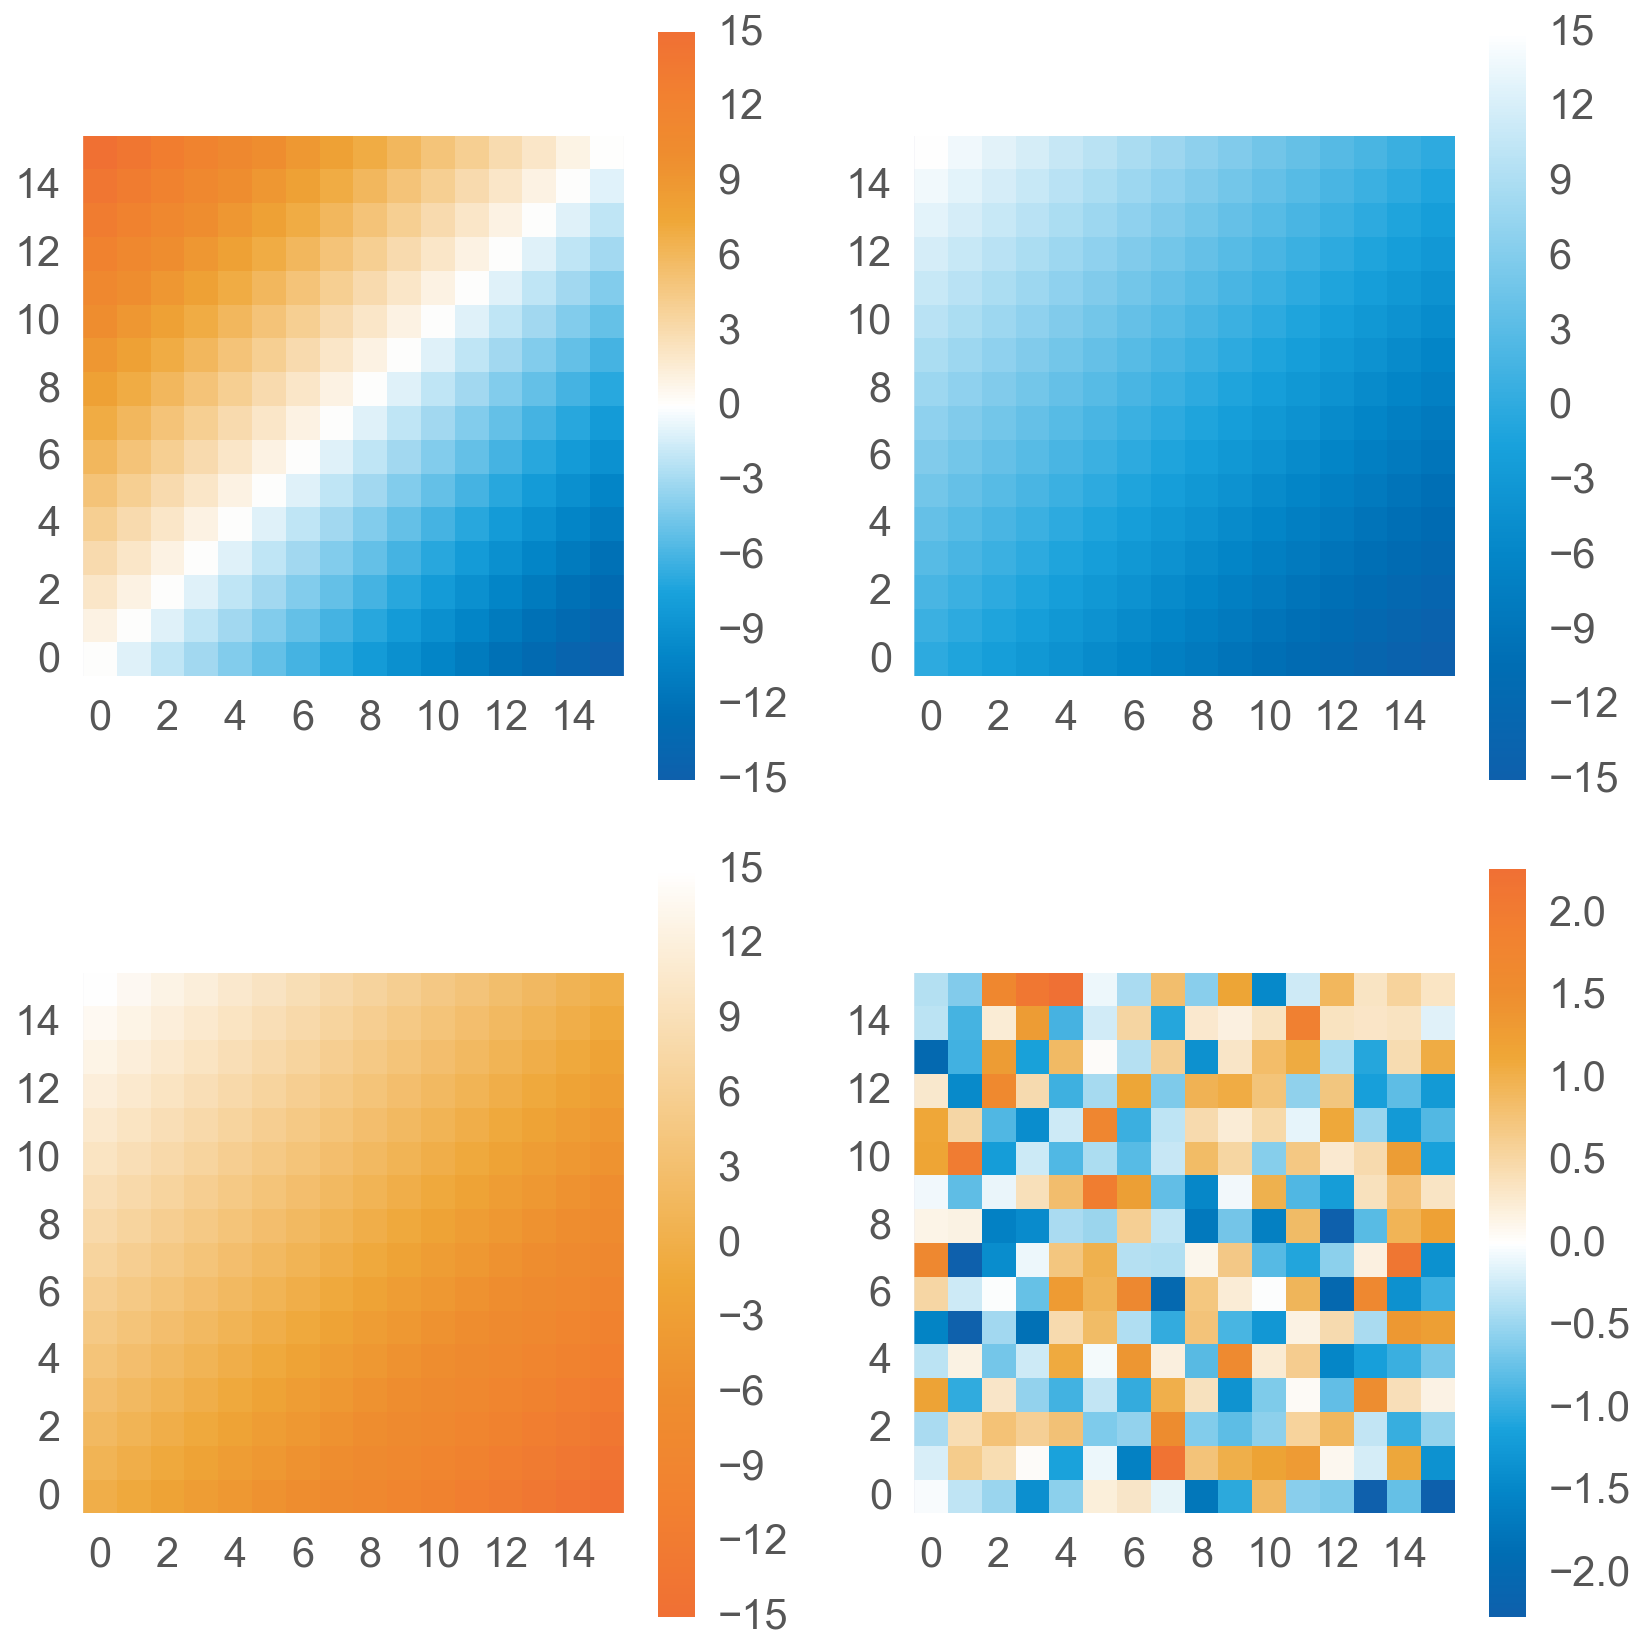

In [29]:
fig, ax_grid = plt.subplots(2,2, figsize=(12, 12))

(ax1, ax2), (ax3, ax4) = ax_grid

n = 16
xx, yy = np.meshgrid(np.arange(n), np.arange(n))

im1 = ax1.imshow(yy - xx, origin='lower', cmap='svds_diverging', interpolation='none')
ax1.grid(False)
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(yy-xx, origin='lower', cmap='svds_blues', interpolation='none')
ax2.grid(False)
plt.colorbar(im2, ax=ax2)

im3 = ax3.imshow(yy-xx, origin='lower', cmap='svds_oranges', interpolation='none')
ax3.grid(False)
plt.colorbar(im3, ax=ax3)

rr = np.random.randn(n,n)
vmax = np.max(rr)
im4 = ax4.imshow(rr, origin='lower', cmap='svds_diverging', vmin=-vmax, vmax=vmax, interpolation='none')
ax4.grid(False)
plt.colorbar(im4, ax=ax4)

fig.tight_layout()

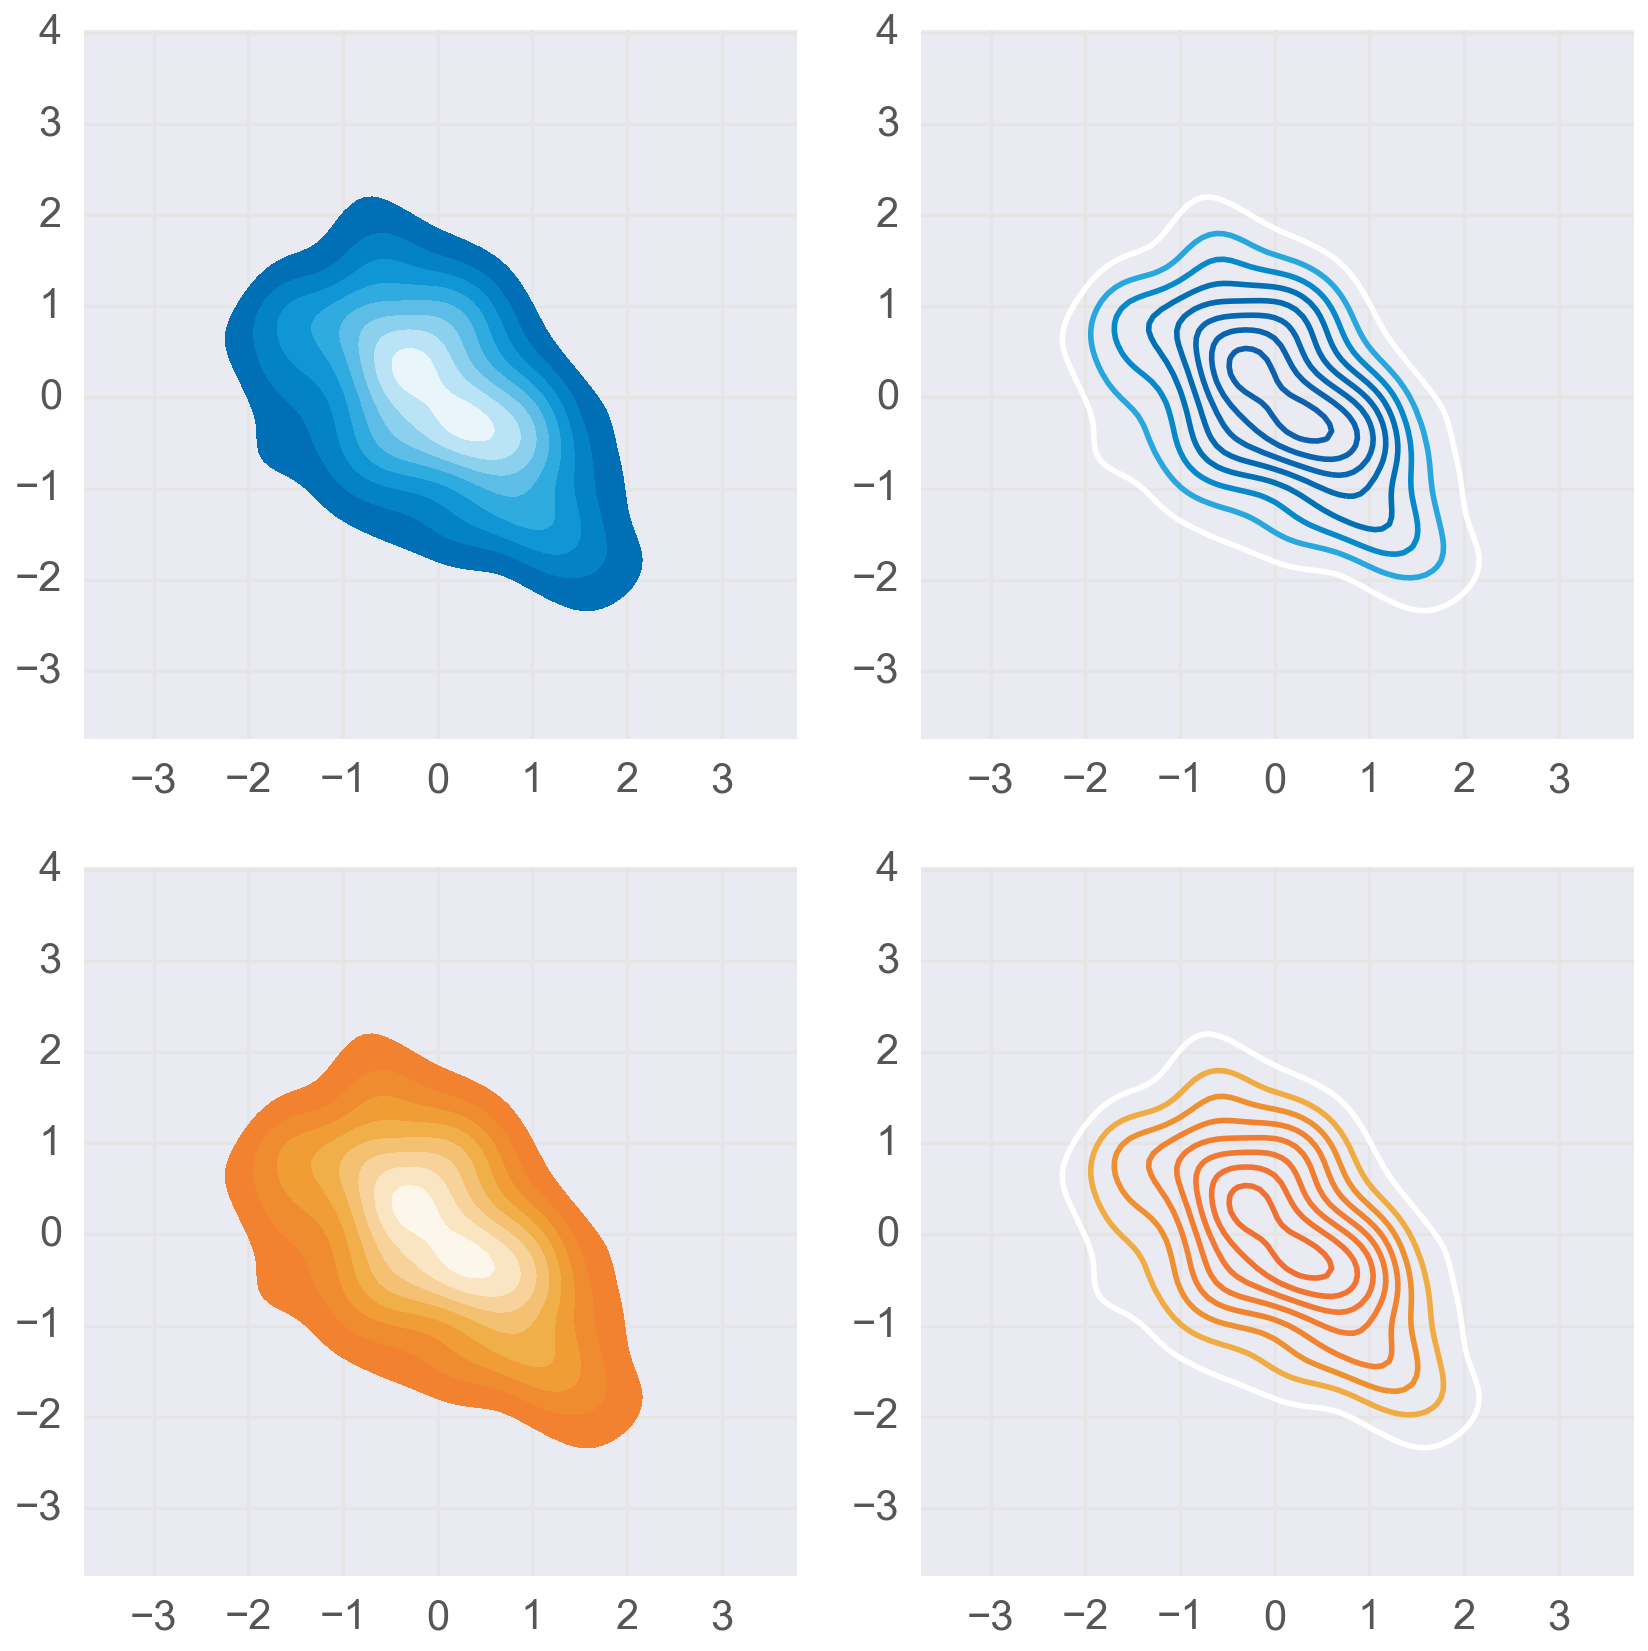

In [30]:
fig, ax_grid = plt.subplots(2, 2, figsize=(12, 12))
(ax1, ax2), (ax3, ax4) = ax_grid
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
sns.kdeplot(x, y, cmap='svds_blues', shade=True, ax=ax1, shade_lowest=False)
sns.kdeplot(x, y, cmap='svds_blues_r', shade=False, ax=ax2)
sns.kdeplot(x, y, cmap='svds_oranges', shade=True, ax=ax3, shade_lowest=False)
sns.kdeplot(x, y, cmap='svds_oranges_r', shade=False, ax=ax4)
fig.tight_layout()

### Examples using matrix / image plot commands

Compare plot commands out of the box:

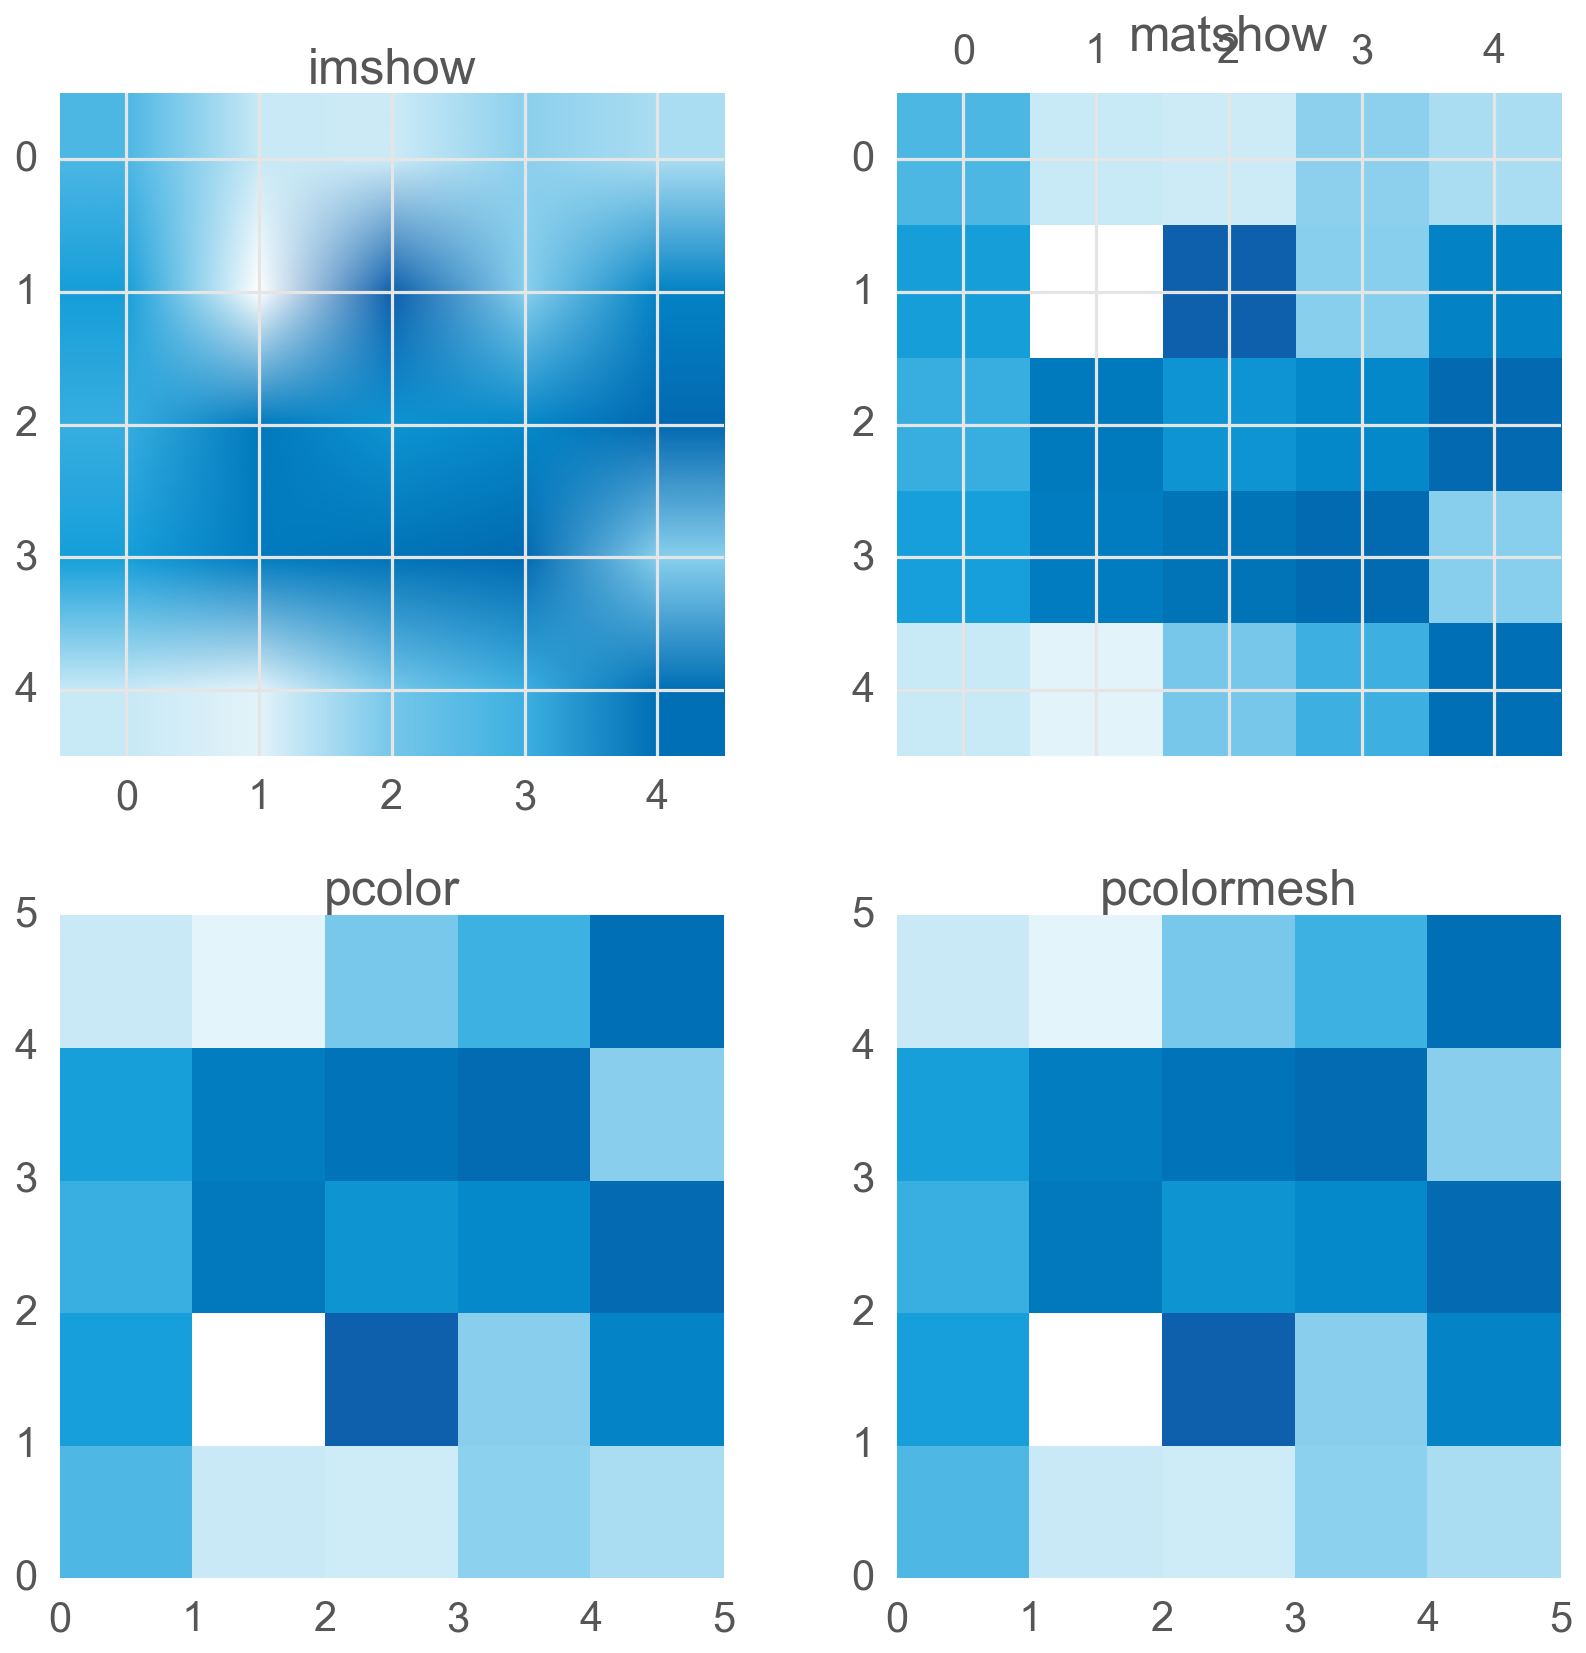

In [31]:
fig, ax_grid = plt.subplots(2, 2, subplot_kw=dict(aspect=1), figsize=(12, 12))

((ax1, ax2), (ax3, ax4)) = ax_grid

a = pd.DataFrame(np.random.rand(5,5), columns = list('abcde'))
a_asndarray = a.values

ax1.imshow(a_asndarray, cmap='svds_blues')
ax1.set_title('imshow')

# matshow is basically the same as imshow w/ slightly  different axis labeling
ax2.matshow(a_asndarray, cmap='svds_blues')
ax2.set_title('matshow')

# notice pcolor and pcolormesh require flipping
ax3.pcolor(a_asndarray, cmap='svds_blues')
ax3.set_title('pcolor')

# pcolormesh is essentially the same as pcolor but much faster so better to use when plotting large images
ax4.pcolormesh(a_asndarray, cmap='svds_blues')
ax4.set_title('pcolormesh')

fig.tight_layout()

Make them all do almost the same thing (ignore tick labeling differences):

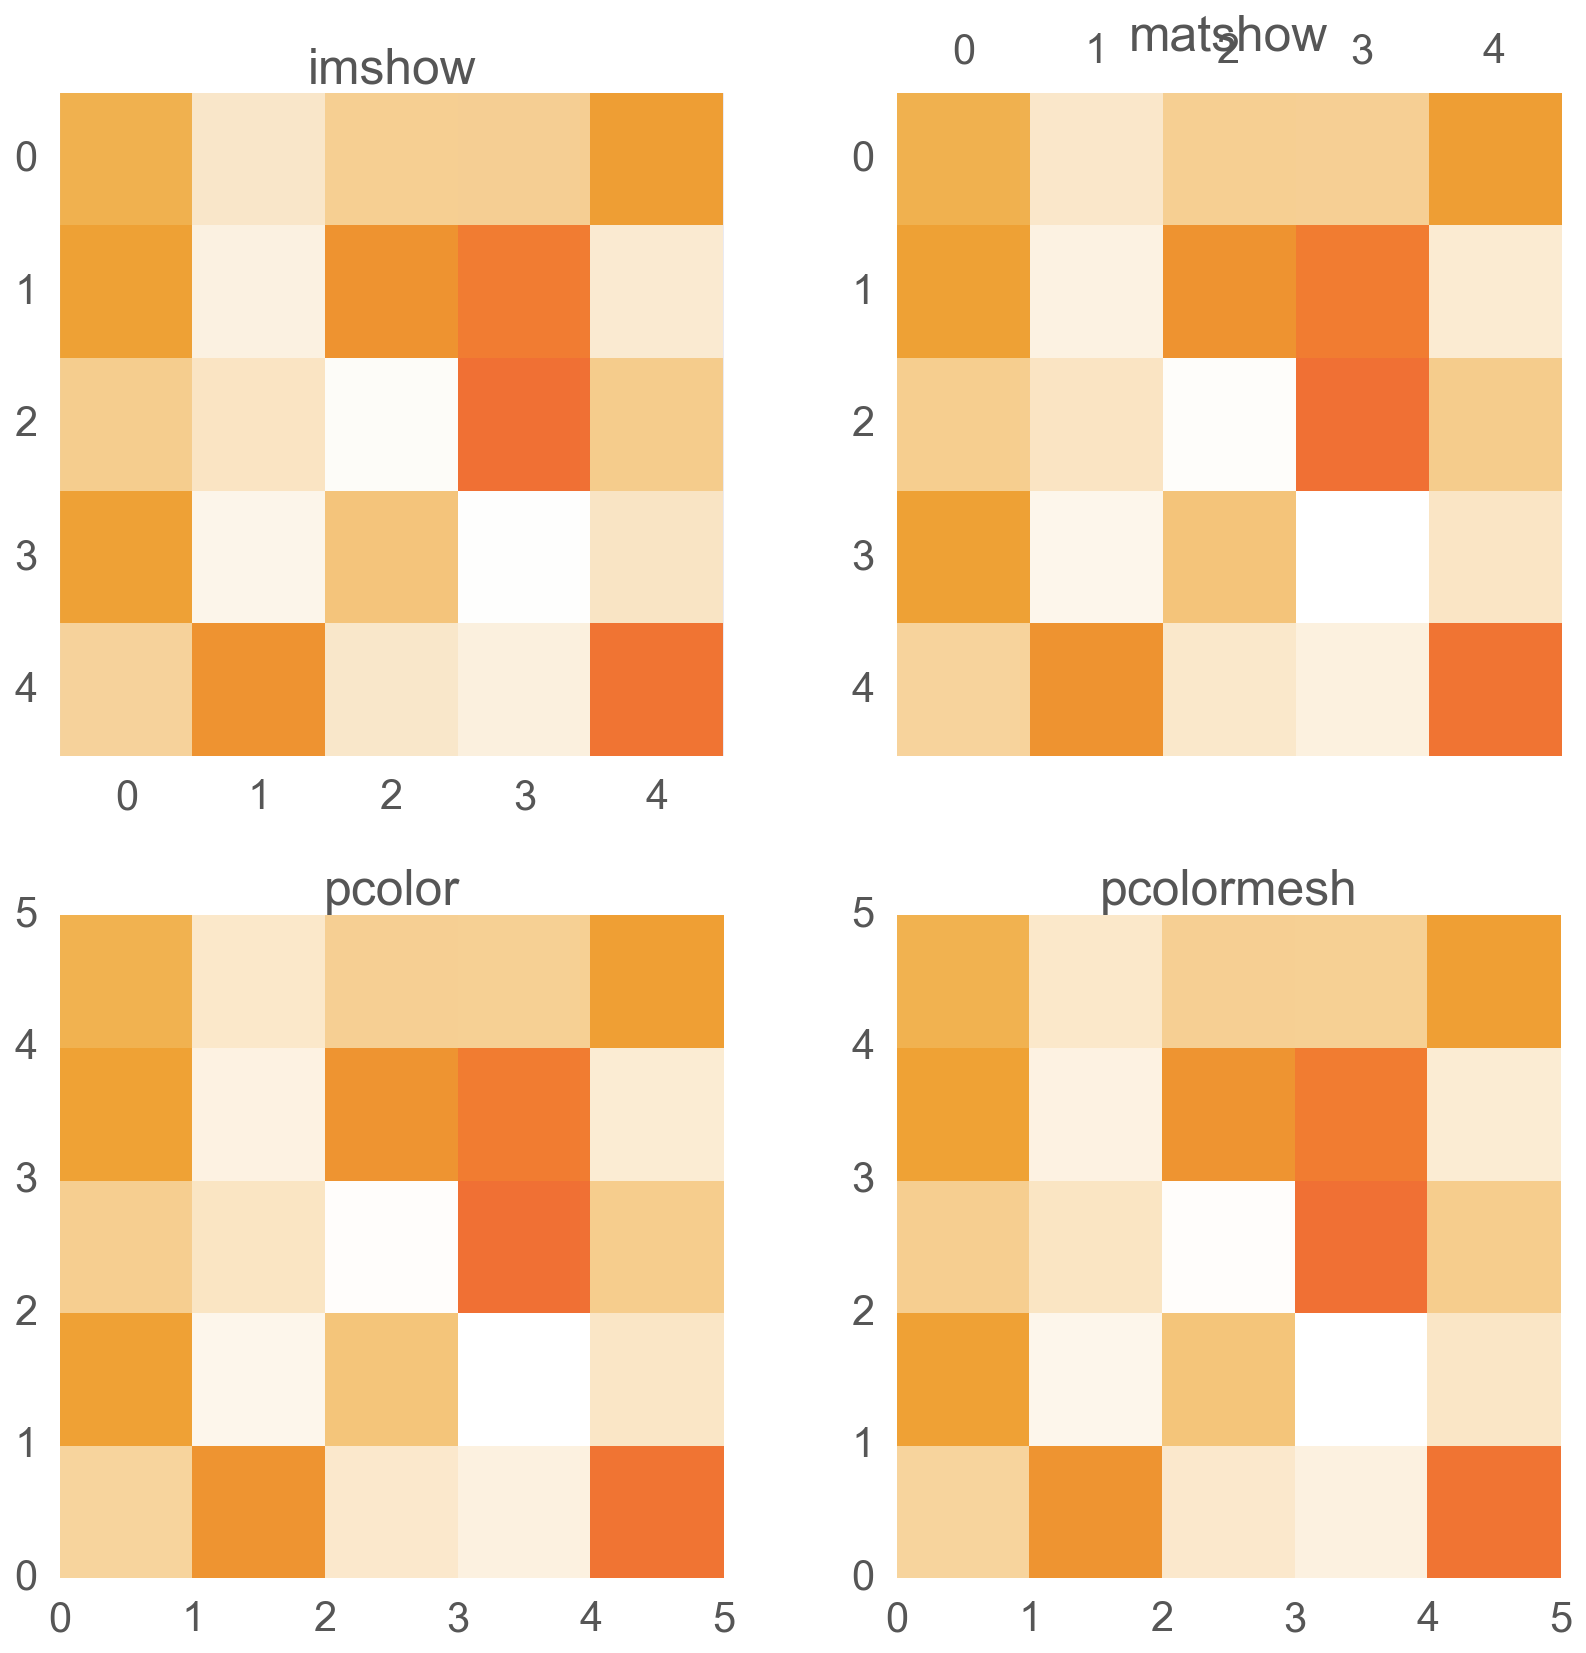

In [32]:
fig, ax_grid = plt.subplots(2, 2, subplot_kw=dict(aspect=1), figsize=(12, 12))

((ax1, ax2), (ax3, ax4)) = ax_grid

a = pd.DataFrame(np.random.rand(5,5), columns = list('abcde'))
a_asndarray = a.values

ax1.imshow(a_asndarray, interpolation='none', cmap='svds_oranges')
ax1.grid(False)
ax1.set_title('imshow')

# matshow is basically the same as imshow w/ slightly  different axis labeling
ax2.matshow(a_asndarray, cmap='svds_oranges')
ax2.grid(False)
ax2.set_title('matshow')

# notice pcolor and pcolormesh require flipping
ax3.pcolor(np.flipud(a_asndarray), cmap='svds_oranges')
ax3.set_title('pcolor')

# pcolormesh is essentially the same as pcolor but much faster so better to use when plotting large images
ax4.pcolormesh(np.flipud(a_asndarray), cmap='svds_oranges')
ax4.set_title('pcolormesh')

fig.tight_layout()